In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib import colors

from boostedhh import utils, hh_vars, plotting
from boostedhh.utils import PAD_VAL
from bbtautau import bbtautau_vars

import logging

logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
logger = logging.getLogger("boostedhh.utils")
logger.setLevel(logging.DEBUG)

In [2]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [3]:
MAIN_DIR = Path("../../../")
CHANNEL = "muon"  # options: "hadronic", "electron", "muon"

base_dir = Path("/ceph/cms/store/user/rkansal/bbtautau/skimmer/")

plot_dir = MAIN_DIR / f"plots/SensitivityStudy/25Jan22{CHANNEL}"
plot_dir.mkdir(parents=True, exist_ok=True)


years = ["2022", "2022EE"]

tags = {
    "data": {
        "2022": "24Nov21ParTMass_v12_private_signal",
        "2022EE": "25Jan22AddYears_v12_private_signal",
    },
    "signal": {
        "2022": "24Nov21ParTMass_v12_private_signal",
        "2022EE": "25Jan22AddYears_v12_private_signal",
    },
}

In [4]:
qcdouts = ["QCD0HF", "QCD1HF", "QCD2HF"]
topouts = ["TopW", "TopbW", "TopbWev", "TopbWmv", "TopbWtauhv", "TopbWq", "TopbWqq"]
sigouts = ["Xtauhtauh", "Xtauhtaue", "Xtauhtaum", "Xbb"]

columns_data = [
    ("weight", 1),
    ("ak8FatJetMsd", 3),
    ("ak8FatJetEta", 3),
    ("ak8FatJetPt", 3),
    ("ak8FatJetPhi", 3),
    ("ak8FatJetPNetXbbLegacy", 3),
    ("ak8FatJetPNetQCDLegacy", 3),
    ("ak8FatJetPNetmassLegacy", 3),
    ("ak8FatJetParTmassResApplied", 3),
    ("ak8FatJetParTmassVisApplied", 3),
]

for branch in (
    bbtautau_vars.HLT_hmu[years[0]]
    + bbtautau_vars.HLT_he[years[0]]
    + bbtautau_vars.HLT_dict[years[0]]["PNet"]
    + bbtautau_vars.HLT_dict[years[0]]["PFJet"]
    + bbtautau_vars.HLT_taus[years[0]]
):
    columns_data.append((branch, 1))

for branch in [f"ak8FatJetParT{key}" for key in qcdouts + topouts + sigouts]:
    columns_data.append((branch, 3))

In [ ]:
bbtautau_vars.HLT_hmu[years[0]] + bbtautau_vars.HLT_he

['HLT_AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35',
 'HLT_AK8PFJet230_SoftDropMass40_PFAK8ParticleNetTauTau0p30',
 'HLT_AK8PFJet425_SoftDropMass40',
 'HLT_IsoMu24',
 'HLT_Mu50',
 'HLT_IsoMu20_eta2p1_LooseDeepTauPFTauHPS27_eta2p1_CrossL1',
 'HLT_IsoMu24_eta2p1_LooseDeepTauPFTauHPS180_eta2p1',
 'HLT_IsoMu24_eta2p1_LooseDeepTauPFTauHPS30_eta2p1_CrossL1',
 'HLT_IsoMu24_eta2p1_MediumDeepTauPFTauHPS35_L2NN_eta2p1_CrossL1',
 'HLT_IsoMu24_eta2p1_MediumDeepTauPFTauHPS30_L2NN_eta2p1_CrossL1',
 'HLT_IsoMu24_eta2p1_MediumDeepTauPFTauHPS45_L2NN_eta2p1_CrossL1',
 'HLT_IsoMu20_eta2p1_TightChargedIsoPFTauHPS27_eta2p1_CrossL1',
 'HLT_IsoMu20_eta2p1_TightChargedIsoPFTauHPS27_eta2p1_TightID_CrossL1',
 'HLT_DoubleMediumDeepTauPFTauHPS35_L2NN_eta2p1',
 'HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_PFJet60',
 'HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_PFJet75',
 'HLT_LooseDeepTauPFTauHPS180_L2NN_eta2p1',
 'HLT_AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35',
 'HLT_AK8PFJet230_SoftDropMass40_PF

In [5]:
import copy

columns_signal = copy.deepcopy(columns_data) + [
    ("GenTauhh", 1),
    ("GenTauhmu", 1),
    ("GenTauhe", 1),
    ("GenHiggsEta", 2),
    ("GenHiggsPt", 2),
    ("GenHiggsPhi", 2),
    ("GenHiggsMass", 2),
    ("GenbbEta", 2),
    ("GenbbPt", 2),
    ("GenbbPhi", 2),
    ("GenbbMass", 2),
    ("GenTauEta", 2),
    ("GenTauPt", 2),
    ("GenTauPhi", 2),
    ("GenTauMass", 2),
    ("single_weight_genweight", 1),
    ("single_weight_pileup", 1),
    ("single_weight_ISRPartonShower", 1),
    ("single_weight_FSRPartonShower", 1),
]
# columns_data

In [6]:
# year = "2022"
# a = utils.Sample(
#             path=base_dir / tags["signal"][year],
#             selector=hh_vars.bbtt_sigs["bbtt"][year],
#             label=r"HHbb$\tau\tau$",
#             isData=False,
#             year=year,
#             load_columns = utils.format_columns(columns_signal),
#         )
# b = utils.load_sample(a )
# b["ak8FatJetPt"]

## Define and load samples

In [ ]:
# define samples to load
samples = {
    year: {
        "jetmet": utils.Sample(
            path=base_dir / tags["data"][year],
            selector="JetHT|JetMET",
            label="JetMET",
            isData=True,
            year=year,
            load_columns=utils.format_columns(columns_data),
        ),
        "tau": utils.Sample(
            path=base_dir / tags["data"][year],
            selector="Tau_Run",
            label="Tau",
            isData=True,
            year=year,
            load_columns=utils.format_columns(columns_data),
        ),
        "muon": utils.Sample(
            path=base_dir / tags["data"][year],
            selector="Muon_Run",
            label="Muon",
            isData=True,
            year=year,
            load_columns=utils.format_columns(columns_data),
        ),
        "egamma": utils.Sample(
            path=base_dir / tags["data"][year],
            selector="EGamma_Run",
            label="EGamma",
            isData=True,
            year=year,
            load_columns=utils.format_columns(columns_data),
        ),
        "bbtt": utils.Sample(
            path=base_dir / tags["signal"][year],
            selector=hh_vars.bbtt_sigs["bbtt"][year],
            label=r"HHbb$\tau\tau$",
            isData=False,
            year=year,
            load_columns=utils.format_columns(columns_signal),
        ),
    }
    for year in years
}

# pick signal key based on channel
SIG_KEYS = {"hadronic": "bbtthh", "electron": "bbtthe", "muon": "bbtthmu"}
SIG_KEY = SIG_KEYS[CHANNEL]

# pick relevant data samples based on channel
DATA_KEYS = {
    "hadronic": ["jetmet", "tau"],
    "electron": ["jetmet", "tau", "egamma"],
    "muon": ["jetmet", "tau", "muon"],
}[CHANNEL]

# pick relevant lepton dataset based on channel
LEPTON_DATASET = {"hadronic": None, "electron": "egamma", "muon": "muon"}[CHANNEL]

LEPTON_TRIGGERS = {
    "hadronic": None,
    "electron": bbtautau_vars.HLT_he,
    "muon": bbtautau_vars.HLT_hmu,
}[CHANNEL]

for key in ["jetmet", "tau", "egamma", "muon"]:
    if key not in DATA_KEYS:
        for year in years:
            del samples[year][key]

: 

In [ ]:
# pt_cut = 250
# msd_cut = 40

filters = [
    [
        ("('ak8FatJetPt', '0')", ">=", 250),
        ("('ak8FatJetPNetmassLegacy', '0')", ">=", 50),
        ("('ak8FatJetPt', '1')", ">=", 200),
        # ("('ak8FatJetMsd', '0')", ">=", msd_cut),
        # ("('ak8FatJetMsd', '1')", ">=", msd_cut),
        # ("('ak8FatJetPNetXbb', '0')", ">=", 0.8),
    ],
]


# dictionary that will contain all information (from all samples)
events_dict = {year: {} for year in years}

for year in years:
    for key, sample in samples[year].items():
        events_dict[year][key] = utils.load_sample(sample, filters)

    events_dict[year]["bbtthh"] = events_dict[year]["bbtt"][
        events_dict[year]["bbtt"]["GenTauhh"][0]
    ]
    events_dict[year]["bbtthmu"] = events_dict[year]["bbtt"][
        events_dict[year]["bbtt"]["GenTauhmu"][0]
    ]
    events_dict[year]["bbtthe"] = events_dict[year]["bbtt"][
        events_dict[year]["bbtt"]["GenTauhe"][0]
    ]
    del events_dict[year]["bbtt"]


cutflow = {year: pd.DataFrame(index=list(events_dict[year].keys())) for year in years}


for year in years:
    utils.add_to_cutflow(events_dict[year], "Preselection", "finalWeight", cutflow[year])

# cutflow

2025-03-27 21:19:15,368 - INFO - Loading ['JetHT_Run2022C', 'JetMET_Run2022D', 'JetMET_Run2022C']
2025-03-27 21:19:15,369 - DEBUG - Loading JetHT_Run2022C
2025-03-27 21:19:21,753 - INFO - Loaded JetHT_Run2022C                                    : 2150129 entries
2025-03-27 21:19:21,815 - DEBUG - Loading JetMET_Run2022D
2025-03-27 21:19:28,849 - INFO - Loaded JetMET_Run2022D                                   : 7859902 entries
2025-03-27 21:19:28,883 - DEBUG - Loading JetMET_Run2022C
2025-03-27 21:19:48,586 - INFO - Loaded JetMET_Run2022C                                   : 18688179 entries
2025-03-27 21:22:54,397 - INFO - Loading ['Tau_Run2022C', 'Tau_Run2022D']
2025-03-27 21:22:54,434 - DEBUG - Loading Tau_Run2022C
2025-03-27 21:23:08,426 - INFO - Loaded Tau_Run2022C                                      : 697018 entries
2025-03-27 21:23:08,599 - DEBUG - Loading Tau_Run2022D
2025-03-27 21:23:13,590 - INFO - Loaded Tau_Run2022D                                      : 427792 entries
2025-0

## Triggers

In [ ]:
for year in years:
    for skey in SIG_KEYS.values():
        triggered = np.sum(
            [events_dict[year][skey][hlt].iloc[:, 0] for hlt in bbtautau_vars.HLT_hmu], axis=0
        ).astype(bool)

        events_dict[year][skey] = events_dict[year][skey][triggered]

### Data (overlap removal)

In [ ]:
trigdict = {year: {"jetmet": {}, "tau": {}} for year in years}

if LEPTON_DATASET:
    for year in years:
        trigdict[year][LEPTON_DATASET] = {}

for year in years:
    for key, d in trigdict[year].items():
        d["all"] = np.sum(
            [events_dict[year][key][hlt].iloc[:, 0] for hlt in bbtautau_vars.HLT_hmu], axis=0
        ).astype(bool)
        d["jets"] = np.sum(
            [
                events_dict[year][key][hlt].iloc[:, 0]
                for hlt in bbtautau_vars.HLT_dict["PNet"] + bbtautau_vars.HLT_dict["PFJet"]
            ],
            axis=0,
        ).astype(bool)
        d["taus"] = np.sum(
            [events_dict[year][key][hlt].iloc[:, 0] for hlt in bbtautau_vars.HLT_taus], axis=0
        ).astype(bool)

        d["taunojets"] = ~d["jets"] & d["taus"]

        if LEPTON_DATASET:
            d[LEPTON_DATASET] = np.sum(
                [events_dict[year][key][hlt].iloc[:, 0] for hlt in LEPTON_TRIGGERS], axis=0
            ).astype(bool)

            d[f"{LEPTON_DATASET}noothers"] = ~d["jets"] & ~d["taus"] & d[LEPTON_DATASET]

Checking event loss by flipping triggers (can skip)

In [ ]:
# xor = np.setdiff1d(
#     events_dict["jetmet"][trigdict["jetmet"]["nojettau"]]["event"][0],
#     events_dict["tau"][trigdict["tau"]["nojettau"]]["event"][0],
# )

# print(len(xor) / len(events_dict["jetmet"]))

# xor = np.setdiff1d(
#     events_dict["tau"][trigdict["tau"]["jetnotau"]]["event"][0],
#     events_dict["jetmet"][trigdict["jetmet"]["jets"]]["event"][0],
# )

# print(len(xor) / len(events_dict["tau"]))

Apply overlap removal

In [ ]:
for year in years:
    events_dict[year]["jetmet"] = events_dict[year]["jetmet"][trigdict[year]["jetmet"]["jets"]]
    events_dict[year]["tau"] = events_dict[year]["tau"][trigdict[year]["tau"]["taunojets"]]
    if LEPTON_DATASET:
        events_dict[year][LEPTON_DATASET] = events_dict[year][LEPTON_DATASET][
            trigdict[year][LEPTON_DATASET][f"{LEPTON_DATASET}noothers"]
        ]

In [ ]:
for year in years:
    utils.add_to_cutflow(events_dict[year], "Triggers", "finalWeight", cutflow[year])
cutflow

{'2022':          Preselection      Triggers
 jetmet   2.869821e+07  1.141837e+07
 tau      1.124810e+06  5.646760e+05
 muon     1.416346e+06  2.577670e+05
 bbtthh   2.420077e-01  2.250557e-01
 bbtthmu  1.003462e-01  9.454388e-02
 bbtthe   1.051738e-01  9.670361e-02,
 '2022EE':          Preselection      Triggers
 jetmet   9.560712e+07  4.708153e+07
 tau      4.087308e+06  1.836202e+06
 muon     4.470385e+06  7.389100e+05
 bbtthh   7.926523e-01  7.327068e-01
 bbtthmu  3.275319e-01  3.085557e-01
 bbtthe   3.259826e-01  2.969195e-01}

## FatJet Gen Matching

In [ ]:
# merge years in gen matching
events = pd.concat([events_dict[y][SIG_KEY] for y in years], keys=[y for y in years])

higgs = utils.make_vector(events, "GenHiggs")
bb = utils.make_vector(events, "Genbb")
tt = utils.make_vector(events, "GenTau")
fatjets = utils.make_vector(events, "ak8FatJet", mstring="Msd")

events

weight ak8FatJetMsd                           ak8FatJetEta  \
                     0            0           1             2            0   
2022   8      0.400307     113.7500   11.296875 -99999.000000    -1.481201   
       10     0.400307      77.3125   87.687500 -99999.000000     0.061424   
       21     0.814061     110.1250   53.843750      0.755859    -0.039169   
       26     1.073157     161.8750   83.500000 -99999.000000     0.911377   
       30     1.082409     133.7500    7.496094 -99999.000000    -0.452698   
...                ...          ...         ...           ...          ...   
2022EE 81995  1.359876      73.9375  121.687500 -99999.000000    -0.951294   
       81997  4.009209     142.7500   92.625000 -99999.000000    -1.277100   
       82000  1.359876     137.8750    0.830566 -99999.000000     1.814453   
       82006  3.360719      68.1250   95.875000 -99999.000000     1.867920   
       82008  1.302533     135.8750   23.203125 -99999.000000     0.758301   

                                     ak8FatJetPt                            \
                     1             2           0           1             2   
2022   8      0.465210 -99999.000000  289.034302  279.668823 -99999.000000   
       10    -0.489929 -99999.000000  311.534027  245.438156 -99999.000000   
       21    -0.285706      0.622314  721.581543  304.024750    240.850357   
       26     0.788696 -99999.000000  563.792786  355.164185 -99999.000000   
       30    -0.113708 -99999.000000  338.825653  228.526443 -99999.000000   
...                ...           ...         ...         ...           ...   
2022EE 81995  0.535400 -99999.000000  329.449982  283.236145 -99999.000000   
       81997 -1.387695 -99999.000000  379.122498  330.120117 -99999.000000   
       82000 -1.013184 -99999.000000  332.650940  238.257416 -99999.000000   
       82006  1.822266 -99999.000000  263.418610  238.317444 -99999.000000   
       82008 -1.744141 -99999.000000  472.942017  256.844360 -99999.000000   

              ... GenTauPhi           GenTauMass      single_weight_genweight  \
              ...         0         1          0    1                       0   
2022   8      ...  2.359375 -1.707031        0.0  0.0                0.033119   
       10     ...  2.414062  2.304688        0.0  0.0                0.033119   
       21     ...  2.703125  2.648438        0.0  0.0                0.033119   
       26     ...  0.458984  0.052612        0.0  0.0                0.033119   
       30     ...  0.096924  2.460938        0.0  0.0                0.033119   
...           ...       ...       ...        ...  ...                     ...   
2022EE 81995  ... -1.027344 -2.109375        0.0  0.0                0.033119   
       81997  ... -1.636719 -1.085938        0.0  0.0                0.033119   
       82000  ... -1.976562 -1.132812        0.0  0.0                0.033119   
       82006  ...  0.042114 -0.147461        0.0  0.0                0.033119   
       82008  ...  1.593750  1.269531        0.0  0.0                0.033119   

             single_weight_pileup single_weight_ISRPartonShower  \
                                0                             0   
2022   8                 0.608305                           1.0   
       10                0.608305                           1.0   
       21                1.237043                           1.0   
       26                1.630764                           1.0   
       30                1.644824                           1.0   
...                           ...                           ...   
2022EE 81995             0.625454                           1.0   
       81997             1.843974                           1.0   
       82000             0.625454                           1.0   
       82006             1.545711                           1.0   
       82008             0.599080                           1.0   

             single_weight_FSRPartonShower weight_noxsec fin

In [ ]:
minbb = np.min(higgs[:, 0:1].deltaR(bb), axis=1)
mintau = np.min(higgs[:, 0:1].deltaR(tt), axis=1)
genhbb1 = minbb < mintau

# minbb = np.min(higgs[:, 1:2].deltaR(bb), axis=1)
# mintau = np.min(higgs[:, 1:2].deltaR(tt), axis=1)
# genhbb2 = minbb < mintau  # overlap with genhb1 < 0.5% of the time

genhbb_mask = np.vstack([genhbb1, ~genhbb1]).T
genhbb = higgs[genhbb_mask]
genhtt = higgs[~genhbb_mask]

In [ ]:
fjbbdr = fatjets.deltaR(genhbb[:, np.newaxis])
fjidbb = np.argmin(fjbbdr, axis=1)
fjttdr = fatjets.deltaR(genhtt[:, np.newaxis])
fjidtt = np.argmin(fjttdr, axis=1)
# 5% of events have overlap out of which only 5% actually have two jets both close to a gen Higgs,
# so ignoring these overlap events for now
overlap = fjidbb == fjidtt

In [ ]:
np.mean(overlap)

0.07270617809146282

## Taggers

In [ ]:
taggers_dict = {year: {} for year in years}

taukey = {"hadronic": "Xtauhtauh", "electron": "Xtauhtaue", "muon": "Xtauhtaum"}[CHANNEL]

for year in years:
    for key, events in events_dict[year].items():
        tvars = {}

        qcdouts = ["QCD0HF", "QCD1HF", "QCD2HF"]  # HF = heavy flavor = {c,b}
        topouts = ["TopW", "TopbW"]  # "TopbWev", "TopbWmv", "TopbWtauhv", "TopbWq", "TopbWqq"]
        tvars["PQCD"] = sum([events[f"ak8FatJetParT{k}"] for k in qcdouts]).to_numpy()
        tvars["PTop"] = sum([events[f"ak8FatJetParT{k}"] for k in topouts]).to_numpy()

        for disc in ["Xbb", taukey]:
            tvars[f"{disc}vsQCD"] = np.nan_to_num(
                events[f"ak8FatJetParT{disc}"] / (events[f"ak8FatJetParT{disc}"] + tvars["PQCD"]),
                nan=PAD_VAL,
            )
            tvars[f"{disc}vsQCDTop"] = np.nan_to_num(
                events[f"ak8FatJetParT{disc}"]
                / (events[f"ak8FatJetParT{disc}"] + tvars["PQCD"] + tvars["PTop"]),
                nan=PAD_VAL,
            )

            # make sure not to choose padded jets below by accident
            nojet3 = events["ak8FatJetPt"][2] == PAD_VAL
            tvars[f"{disc}vsQCD"][:, 2][nojet3] = PAD_VAL
            tvars[f"{disc}vsQCDTop"][:, 2][nojet3] = PAD_VAL

        tvars["PNetXbbvsQCD"] = np.nan_to_num(
            events["ak8FatJetPNetXbbLegacy"]
            / (events["ak8FatJetPNetXbbLegacy"] + events["ak8FatJetPNetQCDLegacy"]),
            nan=PAD_VAL,
        )

        # jet assignment
        fjbbpick = np.argmax(tvars["XbbvsQCD"], axis=1)
        fjttpick = np.argmax(tvars[f"{taukey}vsQCD"], axis=1)
        overlap = fjbbpick == fjttpick
        fjbbpick[overlap] = np.argsort(tvars["XbbvsQCD"][overlap], axis=1)[:, -2]

        # convert ids to boolean masks
        fjbbpick_mask = np.zeros_like(tvars["XbbvsQCD"], dtype=bool)
        fjbbpick_mask[np.arange(len(fjbbpick)), fjbbpick] = True
        fjttpick_mask = np.zeros_like(tvars[f"{taukey}vsQCD"], dtype=bool)
        fjttpick_mask[np.arange(len(fjttpick)),] = True

        tvars["bb_mask"] = fjbbpick_mask
        tvars["tautau_mask"] = fjttpick_mask
        taggers_dict[year][key] = tvars

Checking bb matching accuracy (can skip)

In [ ]:
tvars = {}
if len(years) > 1:
    for key in taggers_dict[years[0]][SIG_KEY].keys():
        tvars[key] = np.concatenate([taggers_dict[year][SIG_KEY][key] for year in years])
else:
    tvars = taggers_dict[years[0]][SIG_KEY]

maxtxbb = np.max(tvars["XbbvsQCD"], axis=1)
fjbbpick = np.argmax(tvars["XbbvsQCD"], axis=1)
maxtxtt = np.max(tvars[f"{taukey}vsQCD"], axis=1)
fjttpick = np.argmax(tvars[f"{taukey}vsQCD"], axis=1)

# how many are assigned correctly?
print(np.mean(fjbbpick == fjidbb))  # 89.4%
print(np.mean(fjttpick == fjidtt))  # 91.2%

overlap = fjbbpick == fjttpick
print(np.mean(overlap))  # 21.1%
# how many pass reasonable tagger cuts?
print(np.sum((maxtxbb > 0.8) * (maxtxtt > 0.95) * overlap) / np.sum(overlap))  # <0.1%

0.8924393309484676
0.9131296529053466
0.21043217635115538
0.002526992878474615


In [ ]:
def get_jet_vals(vals, mask):
    # check if vals is a numpy array
    if not isinstance(vals, np.ndarray):
        vals = vals.to_numpy()

    return vals[mask]

In [ ]:
print(taggers_dict[years[0]])
for key in taggers_dict[years[0]]:
    print("1 \n\n\n")
    print([taggers_dict[year][key] for year in years])
    # np.concatenate([taggers_dict[year][key] for year in years])
# taggers_dict_merged  = {key: np.concatenate([taggers_dict[year][key] for year in years]) for key in taggers_dict[years[0]]}

{'jetmet': {'PQCD': array([[ 3.01276565e-01,  3.07418823e-01, -2.99997000e+05],
       [ 7.08648682e-01,  6.58874512e-02,  9.69512939e-01],
       [ 6.58676147e-01,  2.62153596e-02, -2.99997000e+05],
       ...,
       [ 8.39660645e-01,  5.84167480e-01, -2.99997000e+05],
       [ 7.36446708e-01,  2.22225189e-01,  7.77709961e-01],
       [ 2.80624390e-01,  6.01730347e-01, -2.99997000e+05]]), 'PTop': array([[ 1.73597097e-01,  4.69322205e-02, -1.99998000e+05],
       [ 9.73358154e-02,  1.13945007e-02,  4.54521179e-03],
       [ 3.16162109e-02,  4.62956429e-01, -1.99998000e+05],
       ...,
       [ 3.16543579e-02,  2.37815857e-01, -1.99998000e+05],
       [ 4.93183136e-02,  5.86242676e-02,  3.93066406e-02],
       [ 3.67576599e-01,  4.00009155e-02, -1.99998000e+05]]), 'XbbvsQCD': array([[ 5.32569946e-01,  2.28264923e-03, -9.99990000e+04],
       [ 1.21710670e-03,  4.53279311e-01,  1.61171846e-04],
       [ 4.66356992e-04,  3.77980150e-01, -9.99990000e+04],
       ...,
       [ 3.83103614e

### ROC Curves

In [ ]:
from sklearn.metrics import roc_curve


def compute_rocs(
    years,
    jets=["bb", "tautau"],
    discs=["XbbvsQCD", "XbbvsQCDTop", f"{taukey}vsQCD", f"{taukey}vsQCDTop", "PNetXbbvsQCD"],
):

    rocs = {}

    if len(years) > 1:  # needs some work
        taggers_dict_merged = {
            key: np.concatenate([taggers_dict[year][key] for year in years])
            for key in taggers_dict[years[0]]
        }
        events_dict_merged = {
            key: np.concatenate([events_dict[year][key] for year in years])
            for key in events_dict[years[0]]
        }
    else:
        taggers_dict_merged = taggers_dict[years[0]]
        events_dict_merged = events_dict[years[0]]

    for jet in jets:
        print(jet)
        rocs[jet] = {}
        for i, disc in enumerate(discs):
            print("\t" + disc)

            bg_scores = np.concatenate(
                [
                    get_jet_vals(
                        taggers_dict_merged[key][disc], taggers_dict_merged[key][f"{jet}_mask"]
                    )
                    for key in DATA_KEYS
                ]
            )
            bg_weights = np.concatenate(
                [events_dict_merged[key]["finalWeight"] for key in DATA_KEYS]
            )

            sig_scores = get_jet_vals(
                taggers_dict_merged[SIG_KEY][disc], taggers_dict_merged[SIG_KEY][f"{jet}_mask"]
            )
            sig_weights = events_dict_merged[SIG_KEY]["finalWeight"]

            fpr, tpr, thresholds = roc_curve(
                np.concatenate([np.zeros_like(bg_scores), np.ones_like(sig_scores)]),
                np.concatenate([bg_scores, sig_scores]),
                sample_weight=np.concatenate([bg_weights, sig_weights]),
            )

            rocs[jet][disc] = {
                "fpr": fpr,
                "tpr": tpr,
                "thresholds": thresholds,
                "label": disc,
                "color": plt.cm.tab10.colors[i],
            }

    return rocs


rocs = {year: compute_rocs([year]) for year in years}

bb
	XbbvsQCD
	XbbvsQCDTop
	XtauhtaumvsQCD
	XtauhtaumvsQCDTop
	PNetXbbvsQCD
tautau
	XbbvsQCD


ValueError: Found input variables with inconsistent numbers of samples: [36737106, 36737106, 12245702]

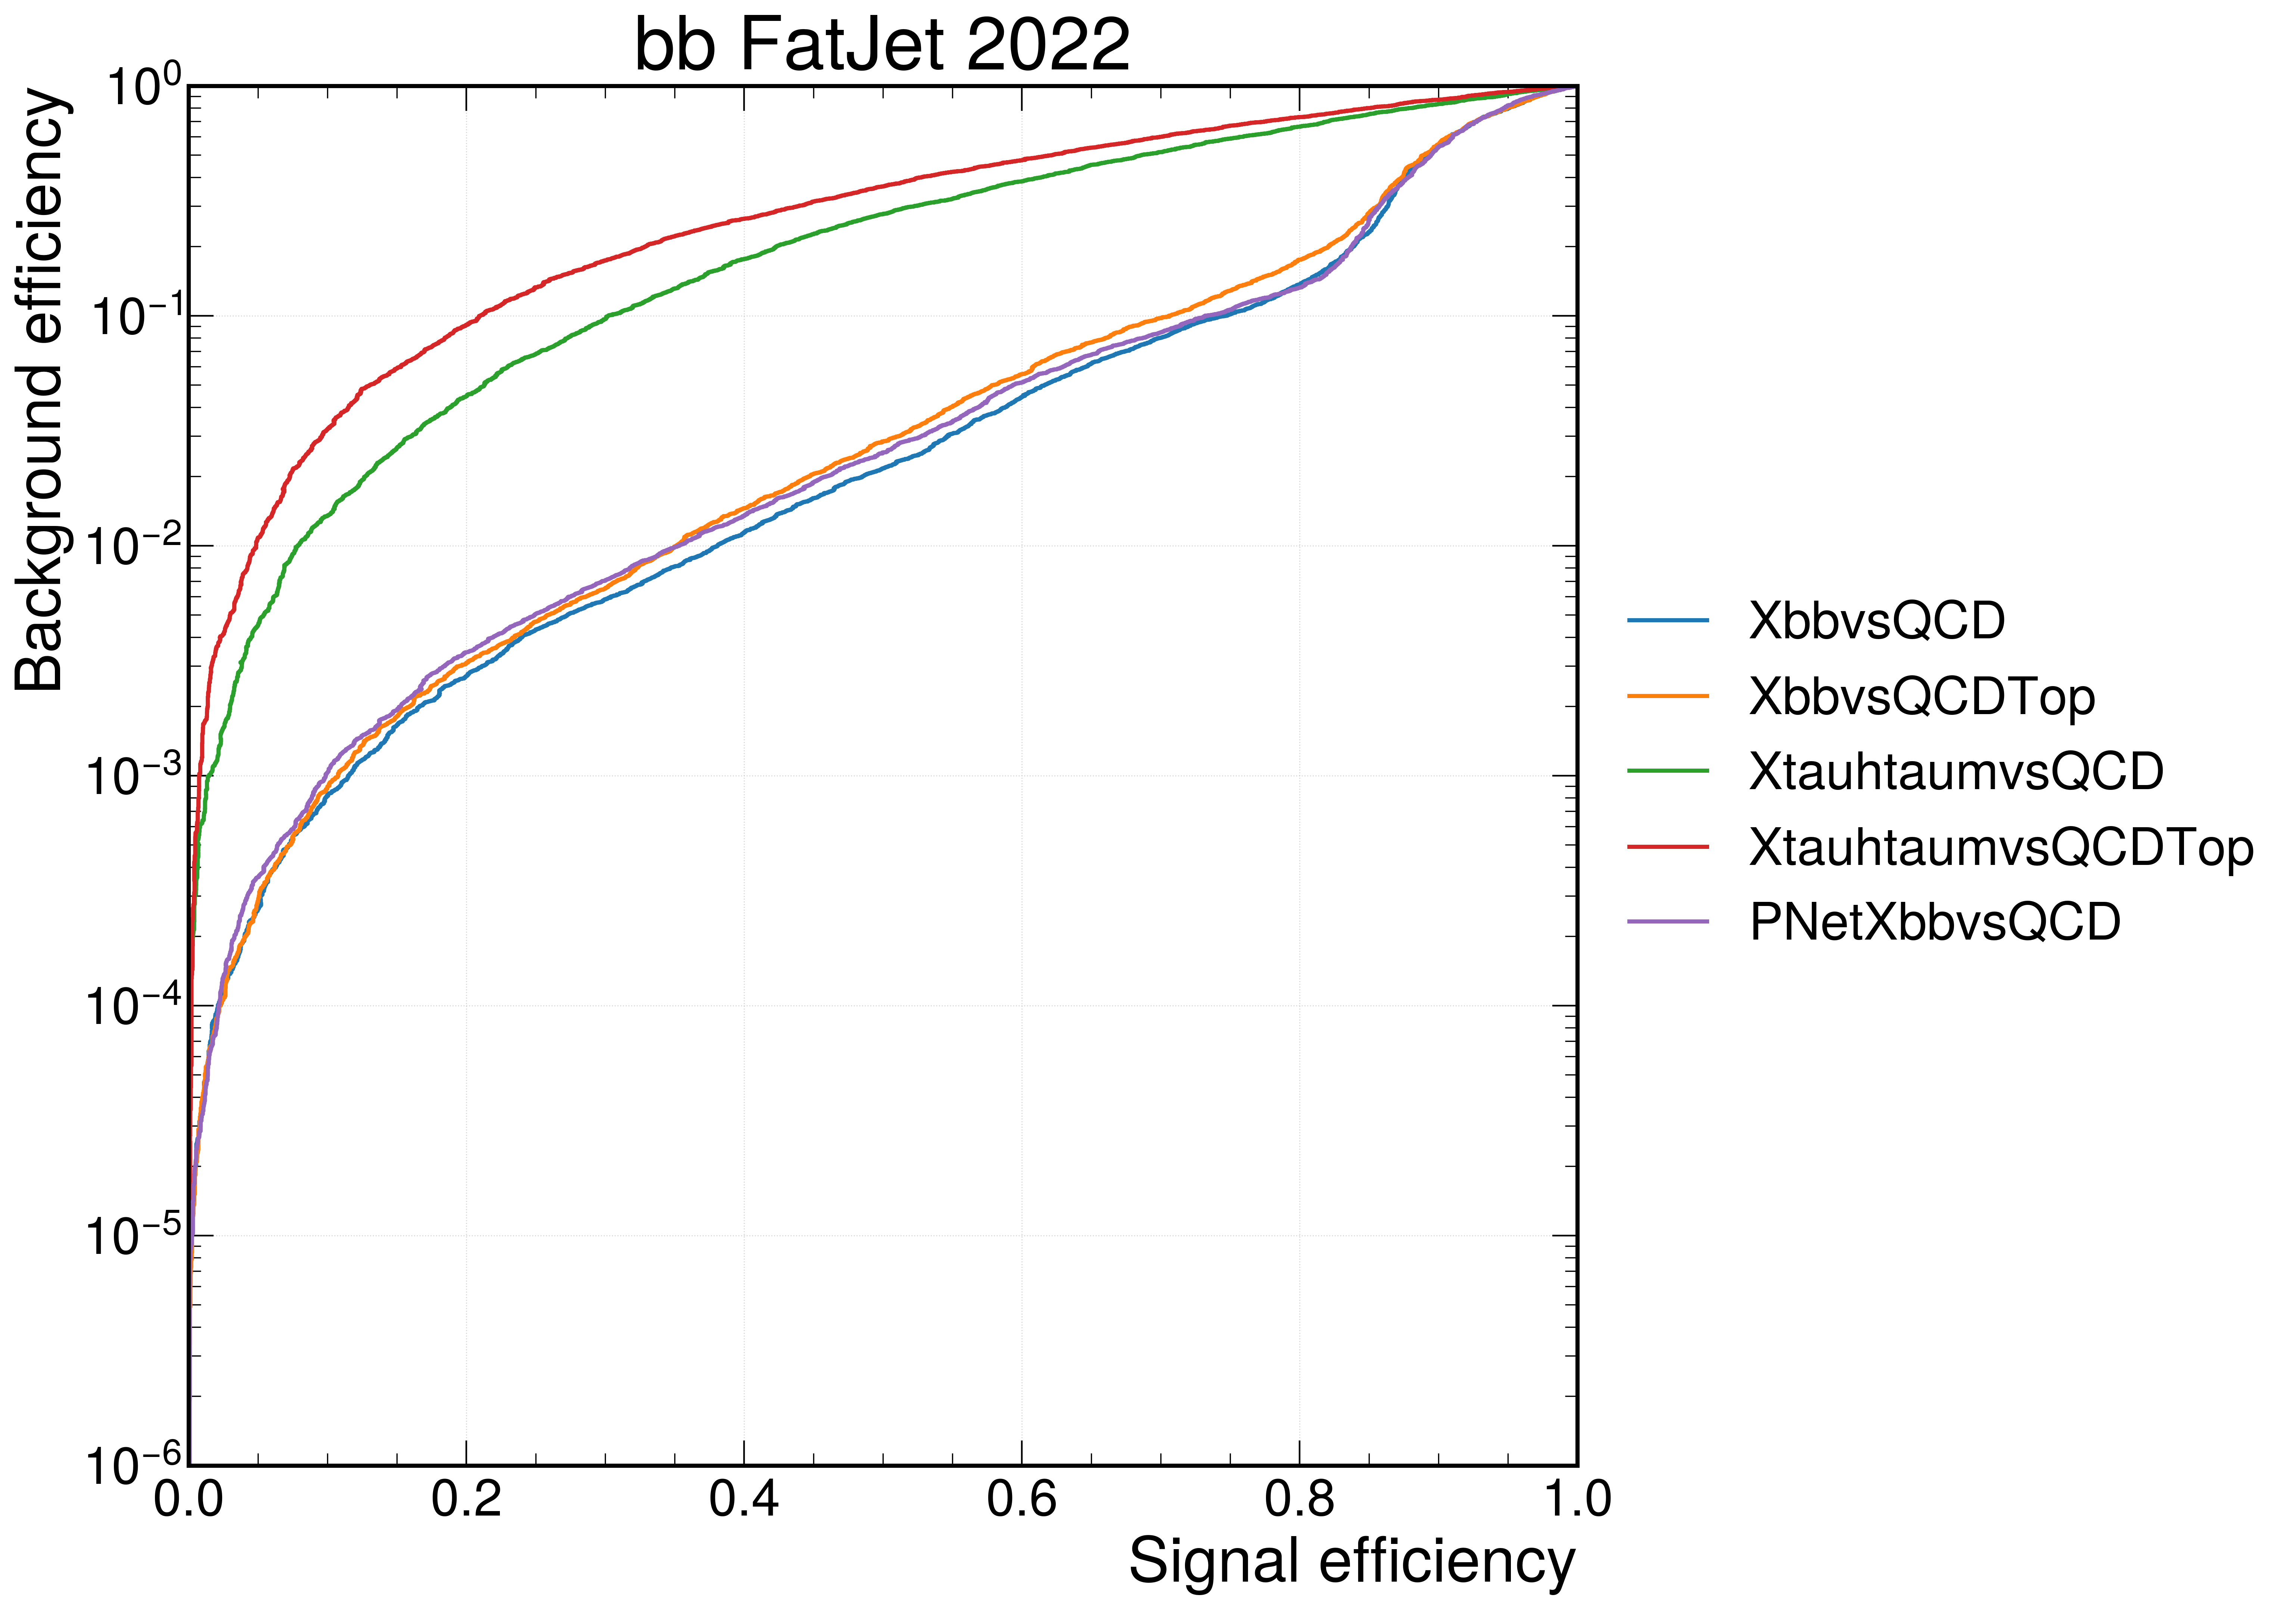

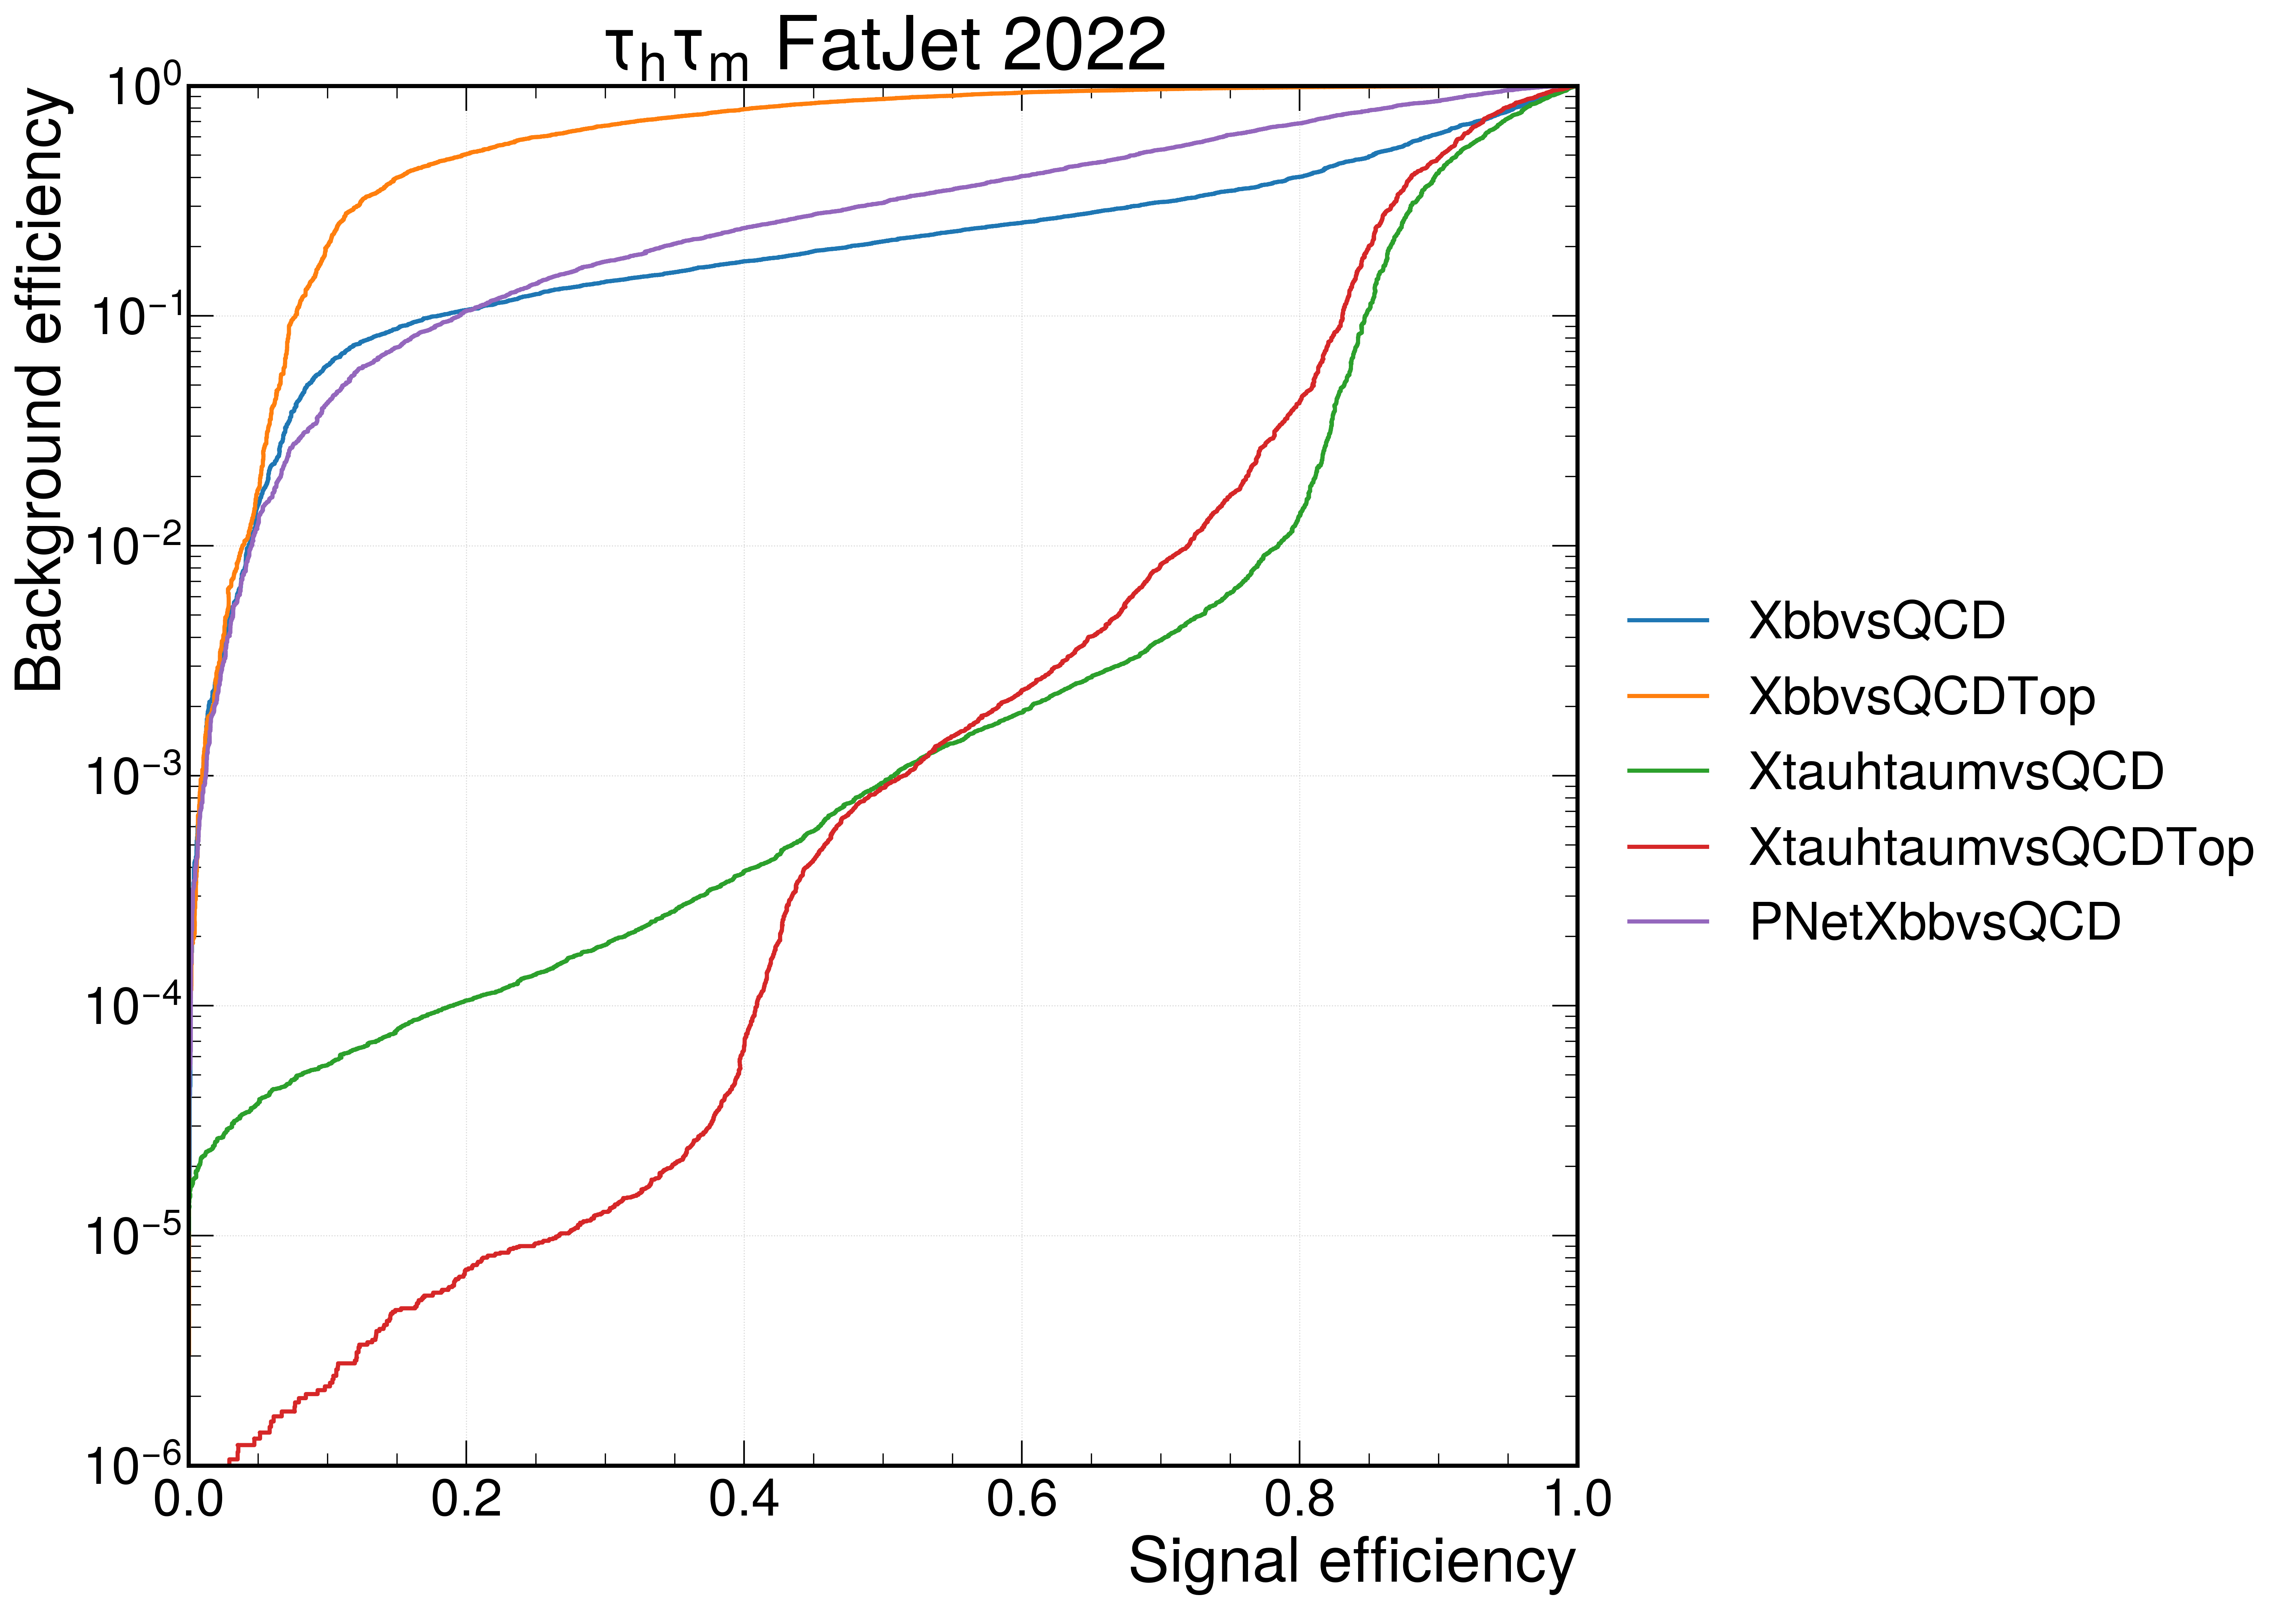

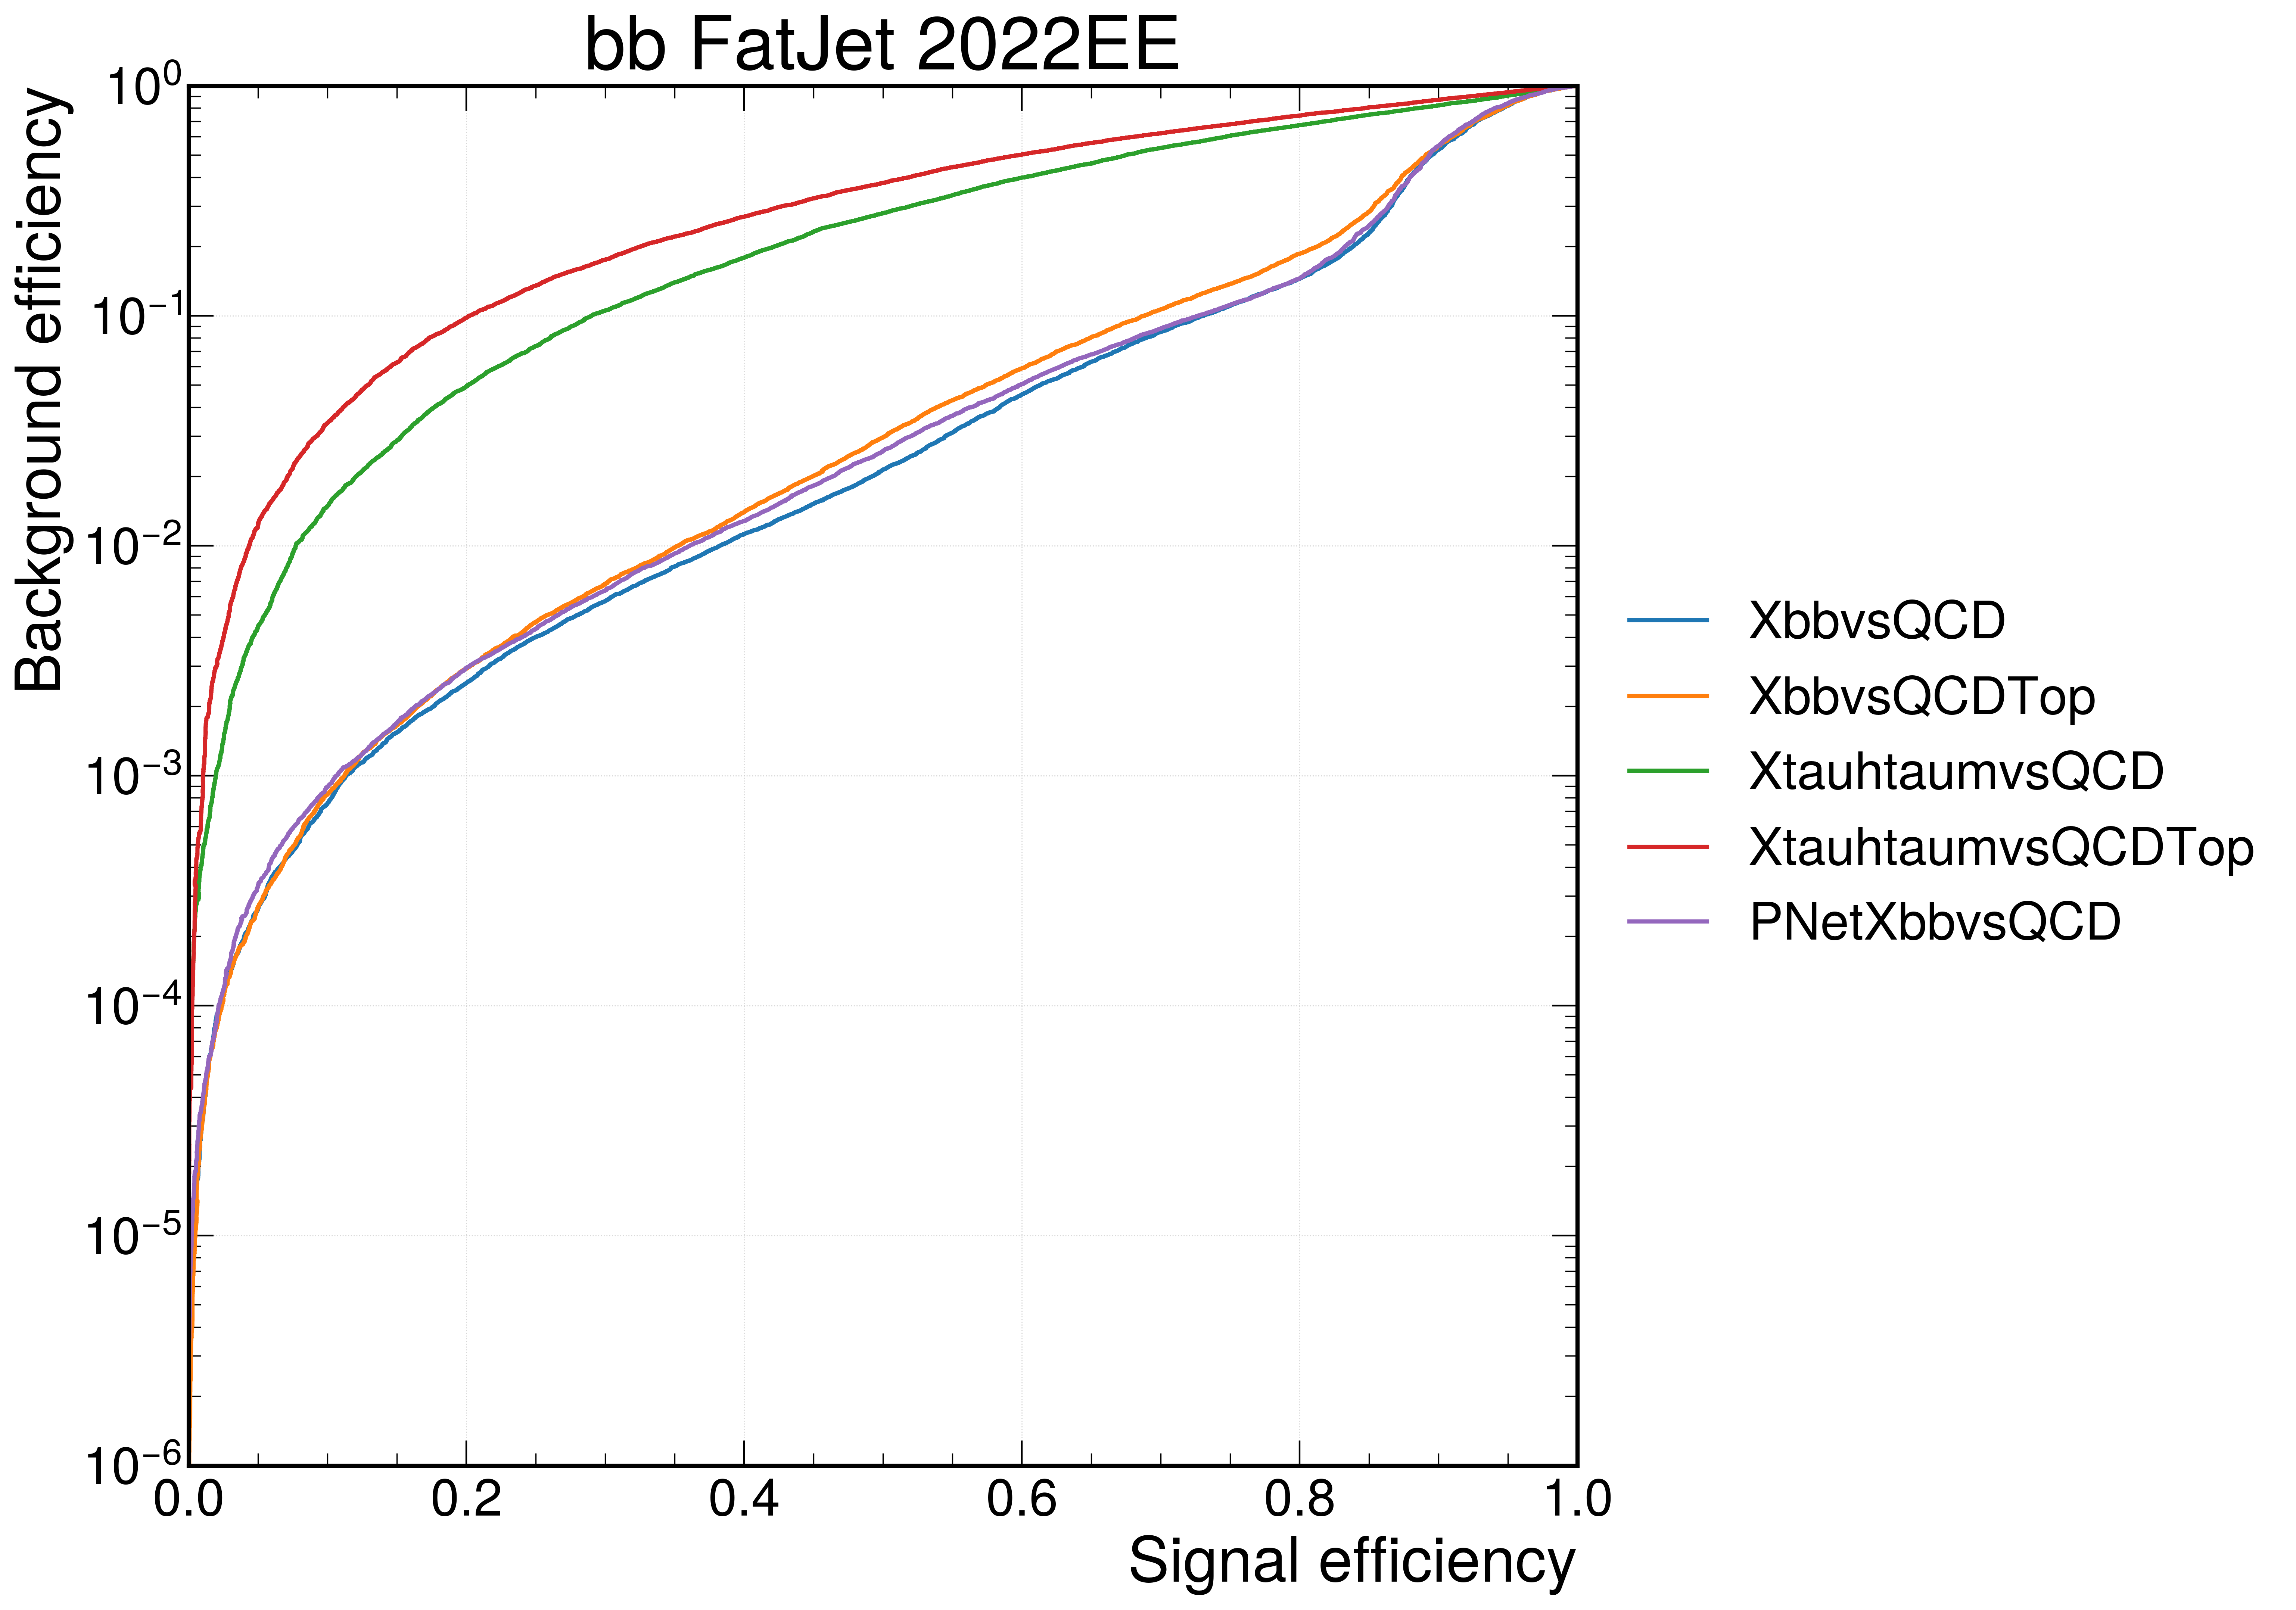

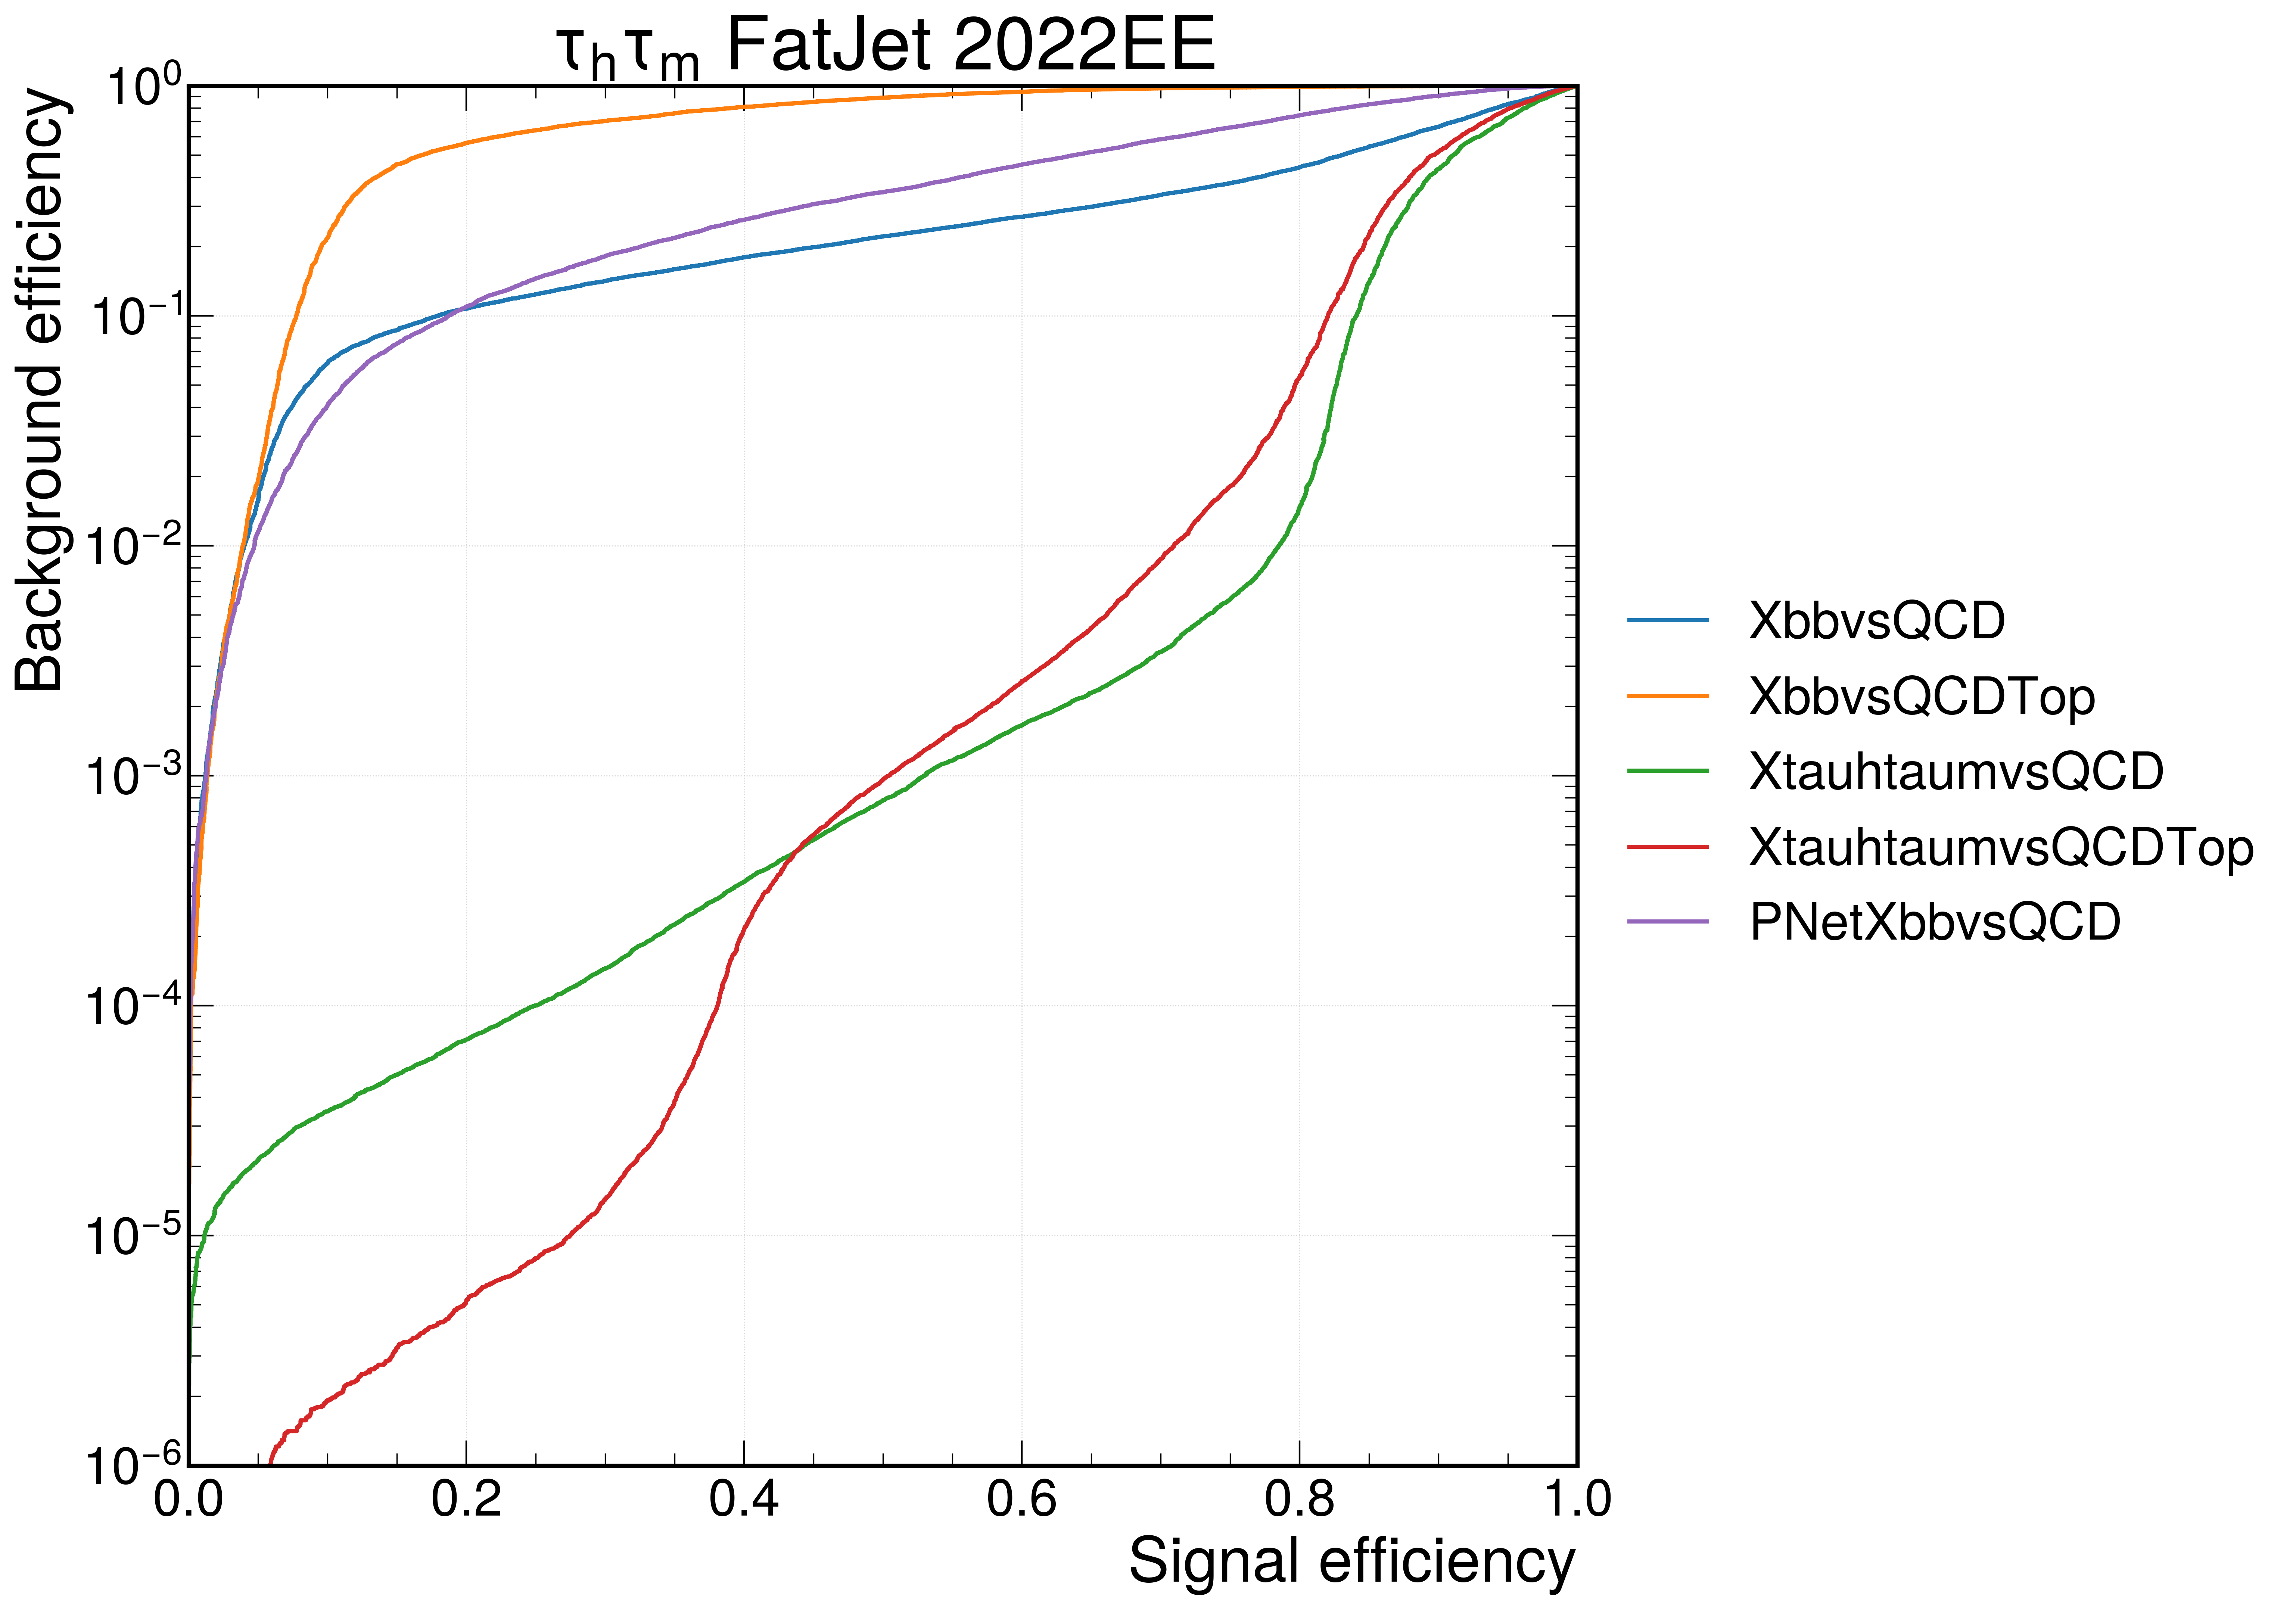

In [ ]:
for year in years:
    for jet, title in zip(["bb", "tautau"], ["bb FatJet", rf"$\tau_h\tau_{CHANNEL[0]}$ FatJet"]):
        plotting.multiROCCurveGrey(
            {"": rocs[year][jet]},
            title=title + " " + year,
            show=True,
            plot_dir=plot_dir,
            name=f"roc_{jet} {year}",
        )

## Mass

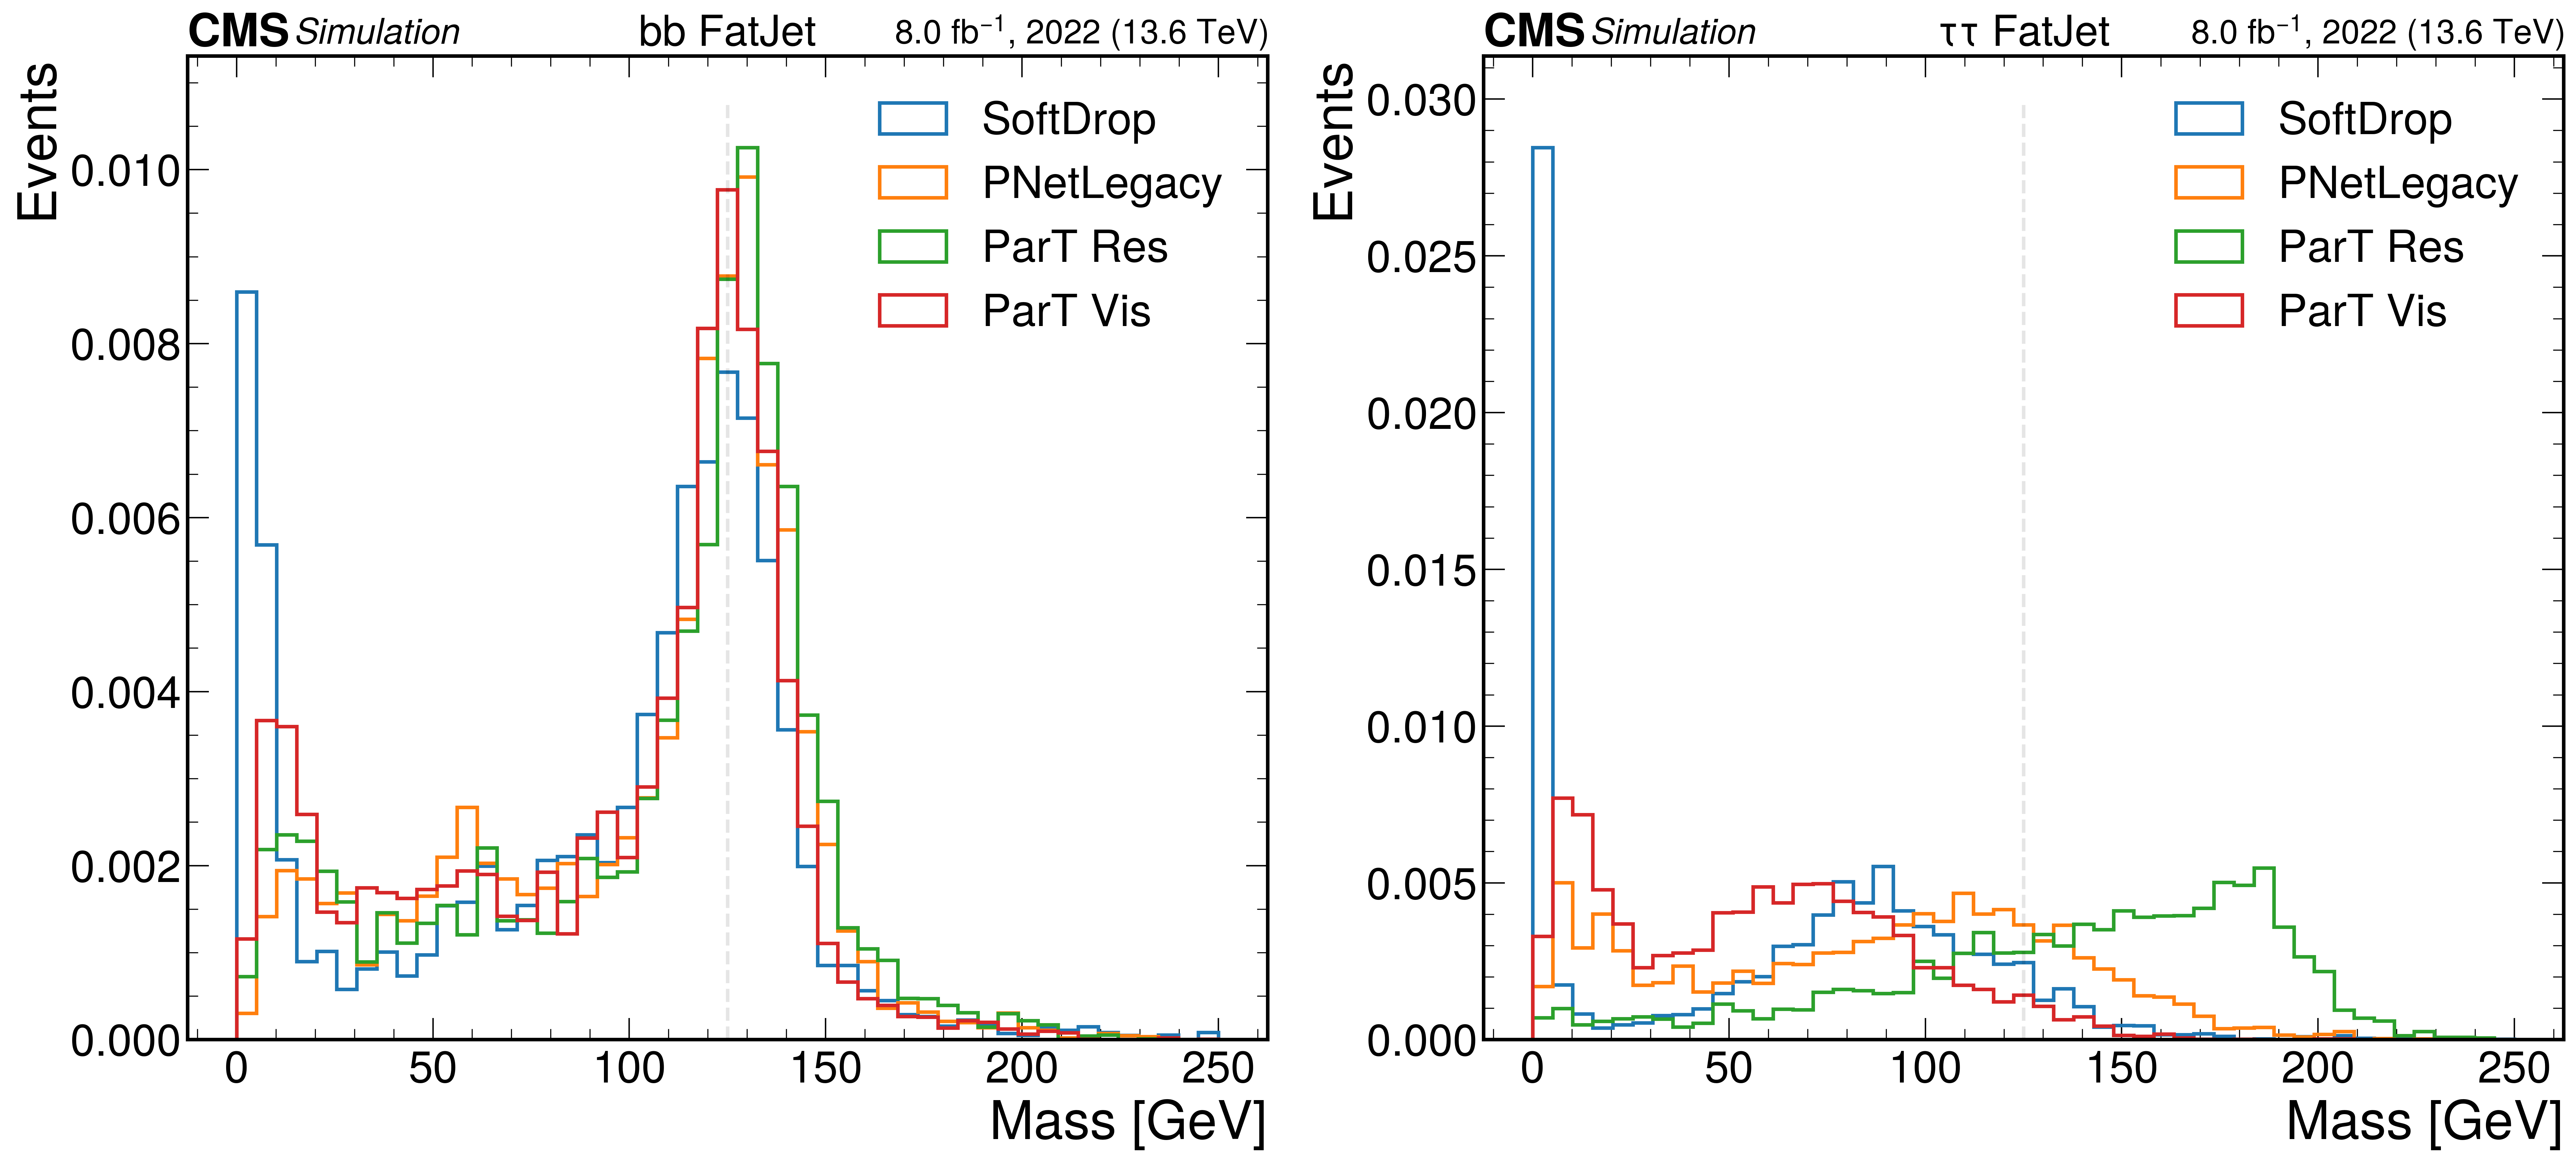

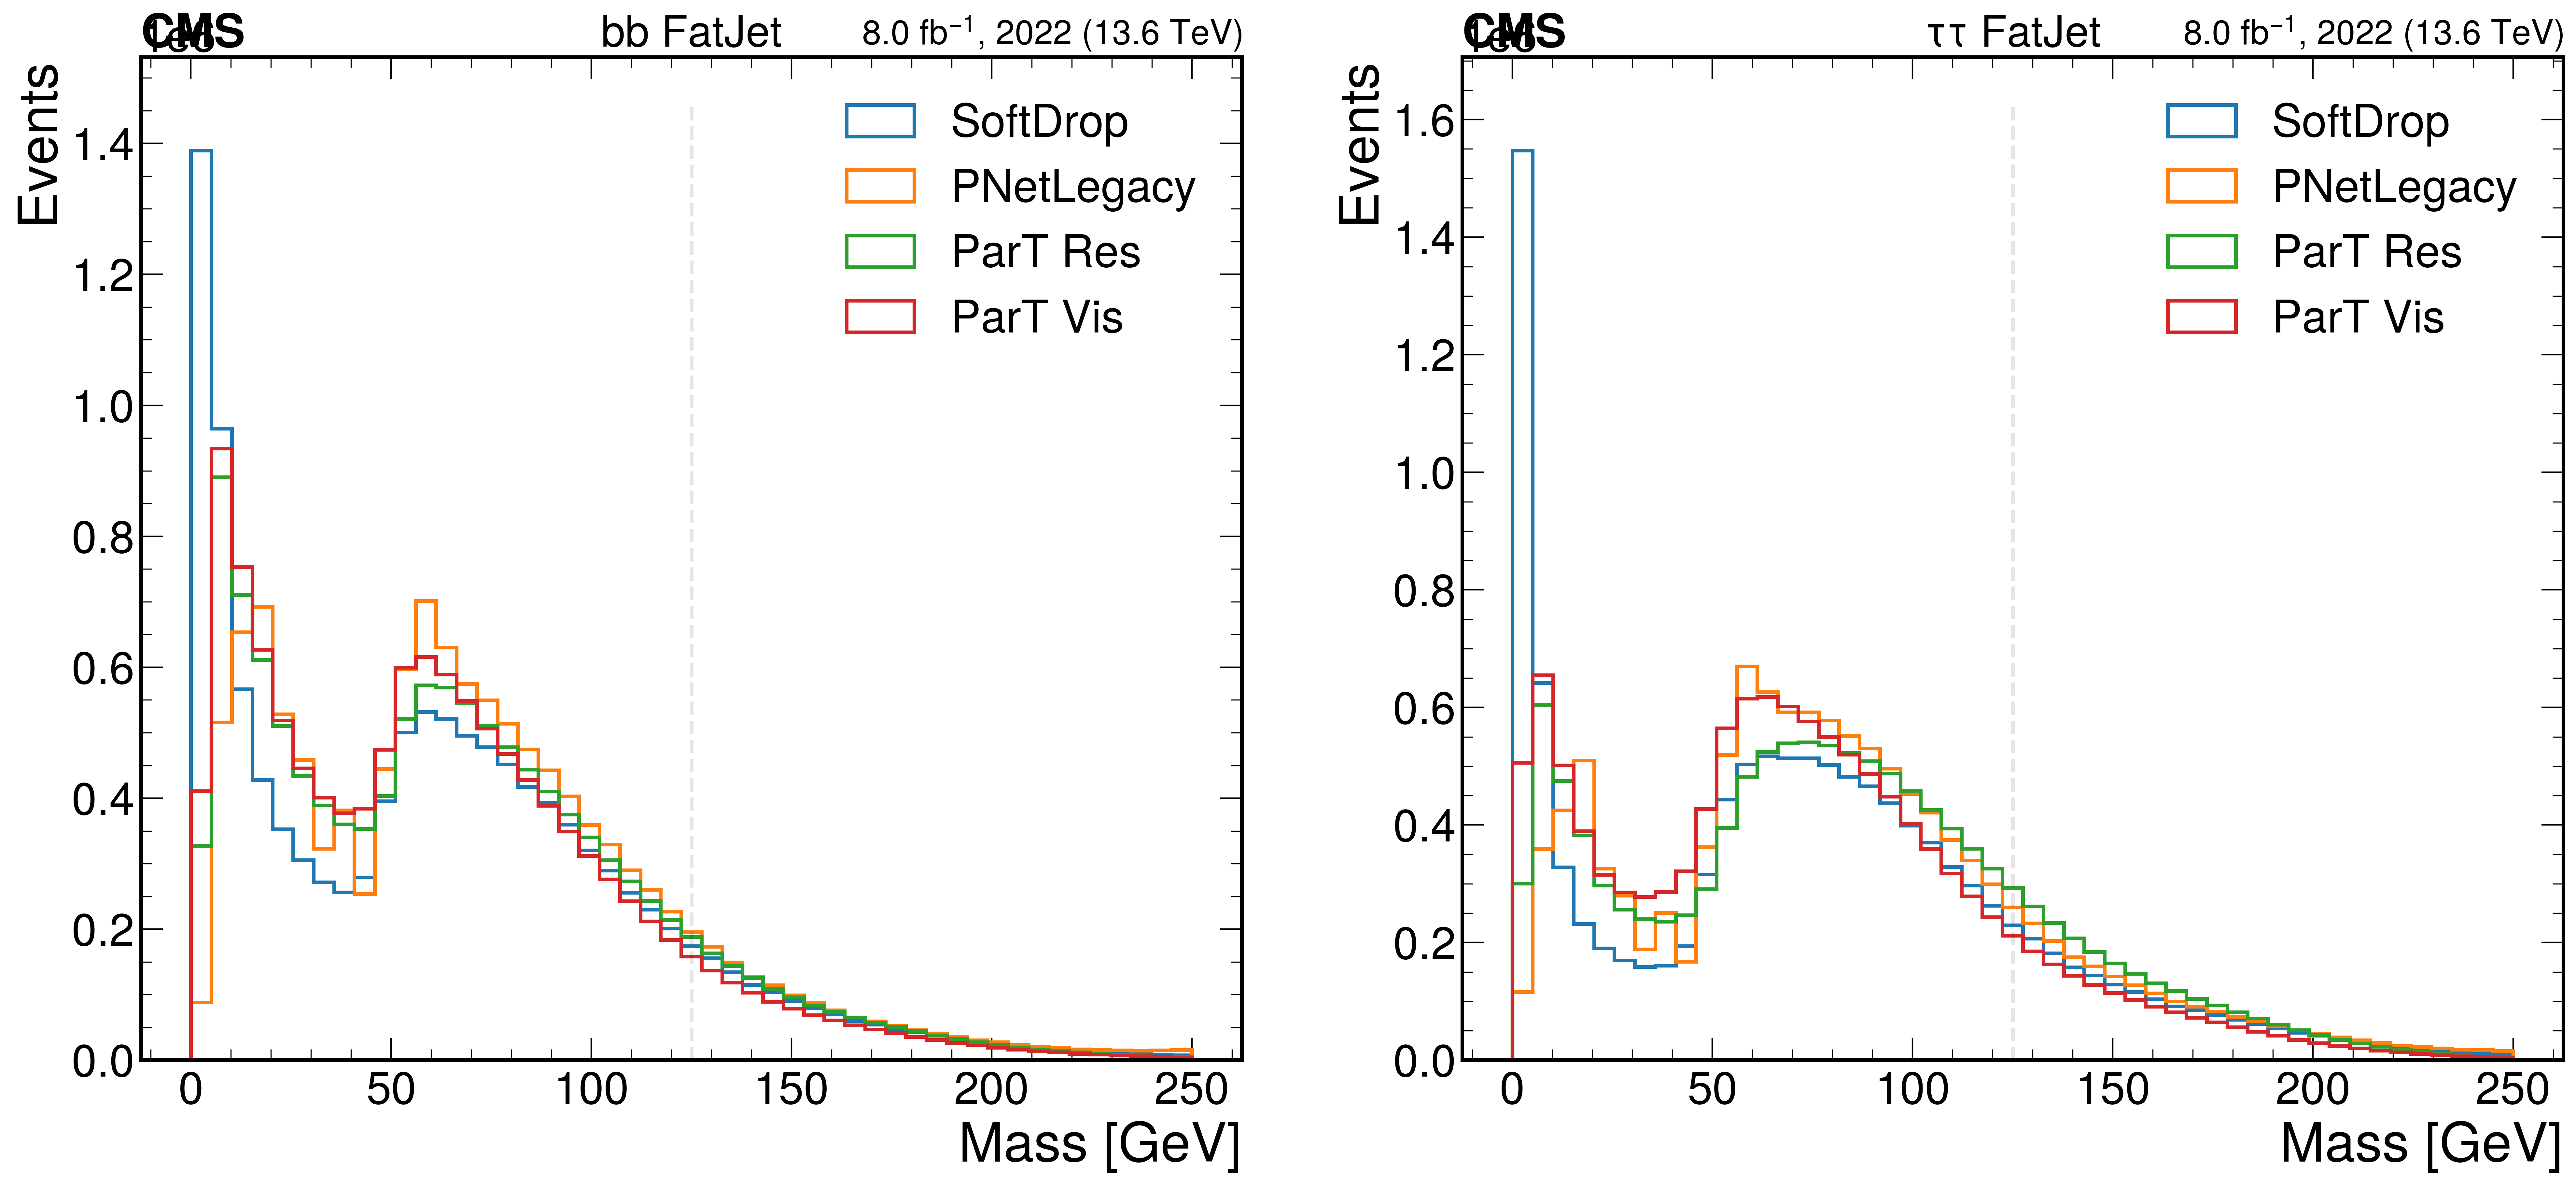

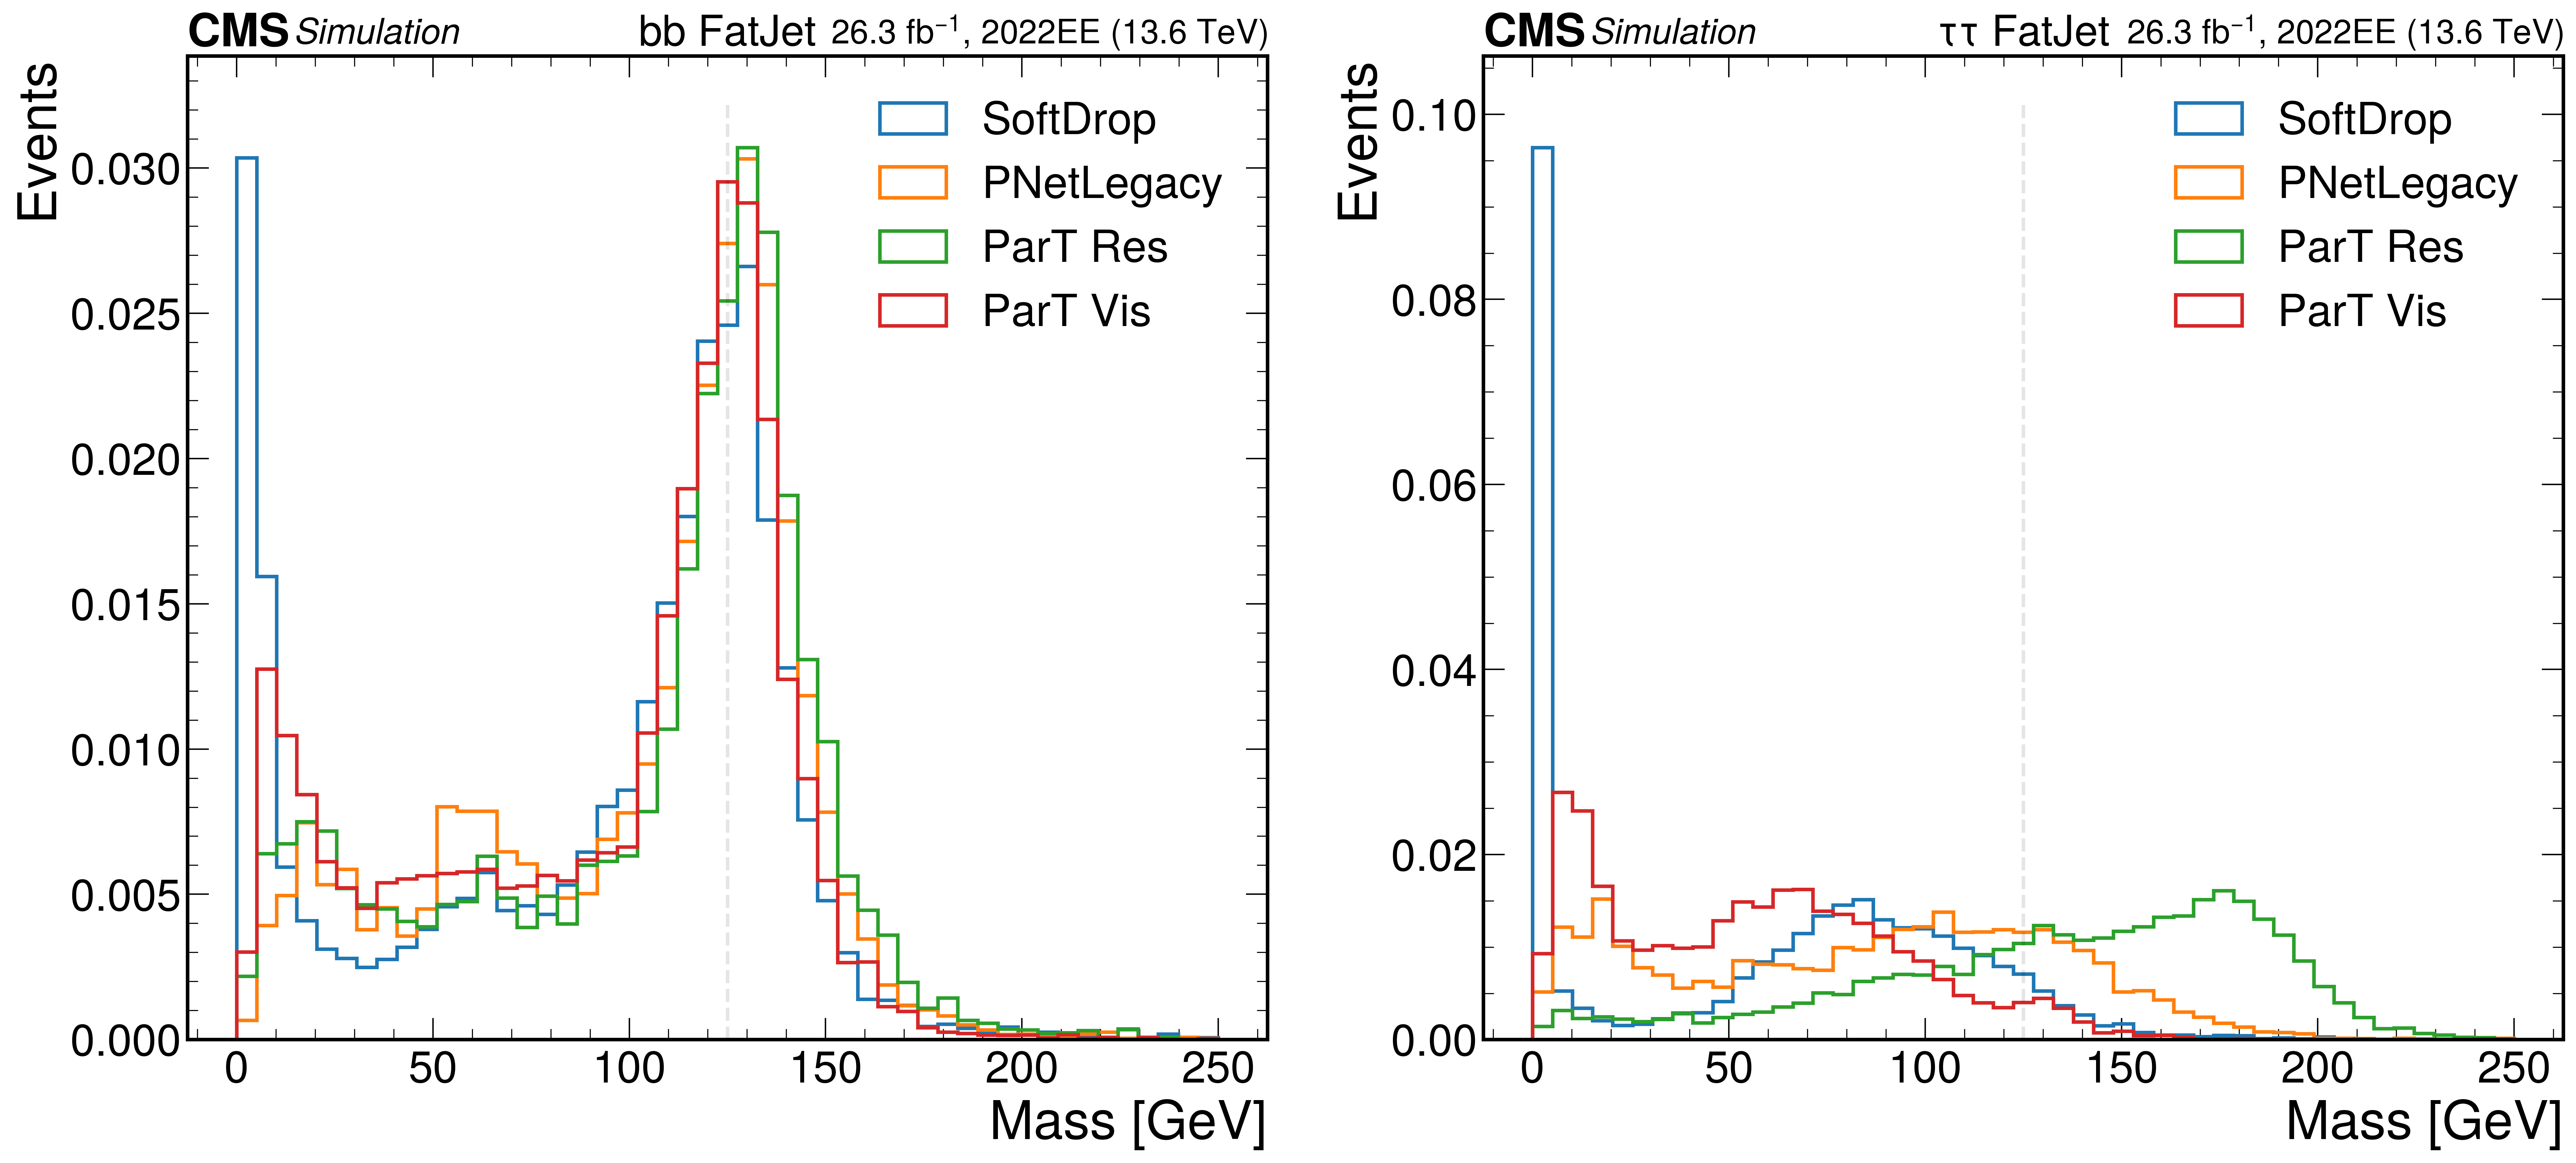

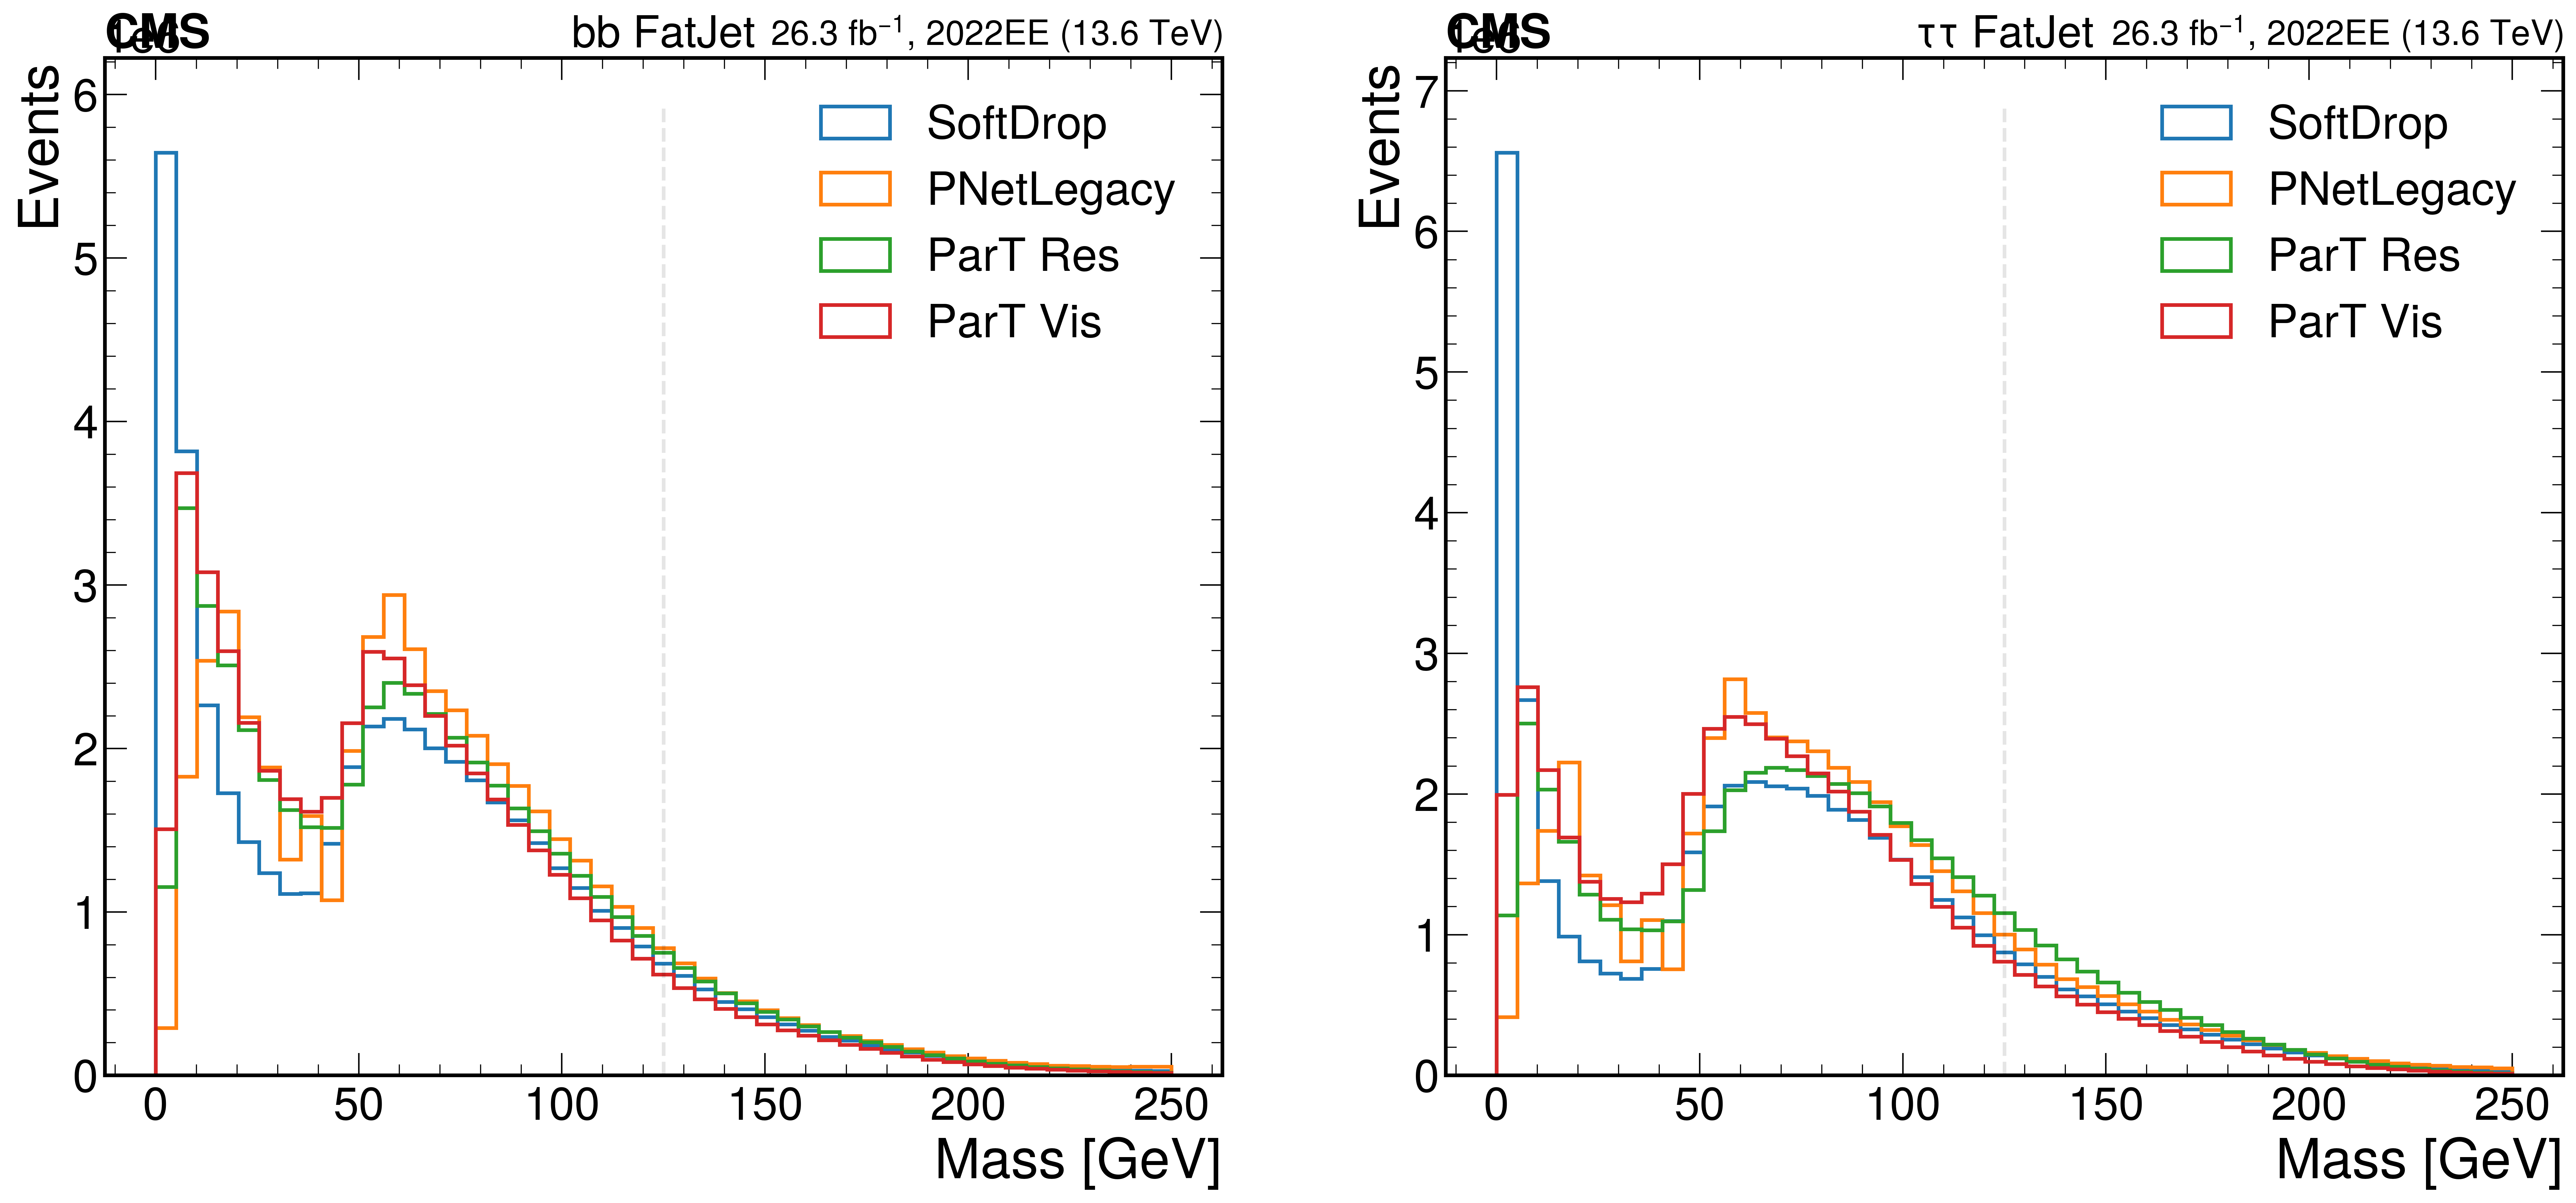

In [ ]:
for year in years:
    for key, label in zip(["hhbbtt", "data"], ["HHbbtt", "Data"]):
        if key == "hhbbtt":
            events = events_dict[year][SIG_KEY]
        else:
            events = pd.concat([events_dict[year][dkey] for dkey in DATA_KEYS])

        bins = np.linspace(0, 250, 50)

        fig, axs = plt.subplots(1, 2, figsize=(24, 10))

        for i, (jet, jlabel) in enumerate(
            zip(["bb", "tautau"], ["bb FatJet", r"$\tau\tau$ FatJet"])
        ):
            ax = axs[i]
            if key == "hhbbtt":
                mask = taggers_dict[year][SIG_KEY][f"{jet}_mask"]
            else:
                mask = np.concatenate(
                    [taggers_dict[year][dkey][f"{jet}_mask"] for dkey in DATA_KEYS], axis=0
                )

            for j, (mkey, mlabel) in enumerate(
                zip(
                    [
                        "ak8FatJetMsd",
                        "ak8FatJetPNetmassLegacy",
                        "ak8FatJetParTmassResApplied",
                        "ak8FatJetParTmassVisApplied",
                    ],
                    ["SoftDrop", "PNetLegacy", "ParT Res", "ParT Vis"],
                )
            ):
                ax.hist(
                    get_jet_vals(events[mkey], mask),
                    bins=bins,
                    histtype="step",
                    weights=events["finalWeight"],
                    label=mlabel,
                    linewidth=2,
                    color=plt.cm.tab10.colors[j],
                )

            ax.vlines(125, 0, ax.get_ylim()[1], linestyle="--", color="k", alpha=0.1)
            ax.set_title(jlabel, fontsize=24)
            ax.set_xlabel("Mass [GeV]")
            # rax.set_xlabel("Mass [GeV]")
            ax.set_ylabel("Events")
            ax.legend()
            ax.set_ylim(0)
            hep.cms.label(
                ax=ax,
                data=key == "data",
                year=year,
                com="13.6",
                fontsize=20,
                lumi=f"{hh_vars.LUMI[year] / 1000:.1f}",
            )

        plt.savefig(plot_dir / f"{key}_{year}_mass.pdf", bbox_inches="tight")
        plt.show()

## Cut-and-count

In [ ]:
bbeff, tteff = 0.44, 0.36  # 0.44, 0.36 values determined by highest sig for 1 bkg event
mbb1, mbb2 = 110.0, 160.0
mbbw2 = (mbb2 - mbb1) / 2
mtt1, mtt2 = 50, 1500

# mbbk = "PNetmassLegacy"
mbbk = "ParTmassResApplied"
# mttk = "PNetmassLegacy"
mttk = "ParTmassResApplied"


for year in years:
    txbbcut = rocs[year]["bb"]["XbbvsQCD"]["thresholds"][
        plotting._find_nearest(rocs[year]["bb"]["XbbvsQCD"]["tpr"], bbeff)
    ]
    txttcut = rocs[year]["tautau"][f"{taukey}vsQCDTop"]["thresholds"][
        plotting._find_nearest(rocs[year]["tautau"][f"{taukey}vsQCDTop"]["tpr"], tteff)
    ]
    print(f"TXbb cut, TXtt cut in {year}:", txbbcut, txttcut)


bg_combined = 0
sig_combined = 0


def compute_sig_bg(year, txbbcut, txttcut, mbb1, mbb2, mbbw2, mtt1, mtt2):
    bg_yield = 0
    sig_yield = 0

    for key in [SIG_KEY] + DATA_KEYS:
        txbbs = get_jet_vals(
            taggers_dict[year][key]["XbbvsQCD"], taggers_dict[year][key]["bb_mask"]
        )
        txtts = get_jet_vals(
            taggers_dict[year][key][f"{taukey}vsQCDTop"], taggers_dict[year][key]["tautau_mask"]
        )
        masstt = get_jet_vals(
            events_dict[year][key][f"ak8FatJet{mttk}"], taggers_dict[year][key]["tautau_mask"]
        )
        massbb = get_jet_vals(
            events_dict[year][key][f"ak8FatJet{mbbk}"], taggers_dict[year][key]["bb_mask"]
        )
        ptbb = get_jet_vals(
            events_dict[year][key]["ak8FatJetPt"], taggers_dict[year][key]["bb_mask"]
        )
        # plt.hist(massbb, np.linspace(0, 200, 100), histtype="step", label=key, weights=events_dict[key]["finalWeight"])

        if key == SIG_KEY:
            cut = (
                (txbbs > txbbcut)
                & (txtts > txttcut)
                & (masstt > mtt1)
                & (masstt < mtt2)
                & (massbb > mbb1)
                & (massbb < mbb2)
                & (ptbb > 250)
            )
            sig_yield = np.sum(events_dict[year][key]["finalWeight"][cut])
        else:
            cut = (
                (txbbs > txbbcut)
                & (txtts > txttcut)
                & (masstt > mtt1)
                & (masstt < mtt2)
                & (ptbb > 250)
            )
            msb1 = (massbb > (mbb1 - mbbw2)) & (massbb < mbb1)
            msb2 = (massbb > mbb2) & (massbb < (mbb2 + mbbw2))
            bg_yield += np.sum(events_dict[year][key]["finalWeight"][cut & msb1])
            bg_yield += np.sum(events_dict[year][key]["finalWeight"][cut & msb2])
    return sig_yield, bg_yield


def study_yield():

    bg_combined = 0
    sig_combined = 0

    for year in years:
        print(
            f"""
          
          
        Yield study year {year}:
        

        
        """
        )

        sig_yield, bg_yield = compute_sig_bg(year, txbbcut, txttcut, mbb1, mbb2, mbbw2, mtt1, mtt2)
        print("Sig yield", sig_yield)
        print("BG yield", bg_yield)
        print("limit", 2 * np.sqrt(bg_yield) / sig_yield)
        print(
            "limit scaled to 22-23 all channels",
            2
            * np.sqrt(bg_yield)
            / sig_yield
            / np.sqrt(hh_vars.LUMI["2022-2023"] / hh_vars.LUMI[year] * 3),
        )
        print(
            "limit scaled to 22-24 all channels",
            2
            * np.sqrt(bg_yield)
            / sig_yield
            / np.sqrt((124000 + hh_vars.LUMI["2022-2023"]) / hh_vars.LUMI[year] * 3),
        )
        print(
            "limit scaled to Run 3 all channels",
            2 * np.sqrt(bg_yield) / sig_yield / np.sqrt((360000) / hh_vars.LUMI[year] * 3),
        )

        bg_combined += bg_yield
        sig_combined += sig_yield

    return sig_combined, bg_combined


sig_combined, bg_combined = study_yield()


print(
    f"""
          
          
        Yield study years combined {years}:
          

          
    """
)

print("Sig yield", sig_combined)
print("BG yield", bg_combined)
print("limit", 2 * np.sqrt(bg_combined) / sig_combined)
print(
    "limit scaled to 22-23 all channels",
    2
    * np.sqrt(bg_combined)
    / sig_combined
    / np.sqrt(hh_vars.LUMI["2022-2023"] / np.sum([hh_vars.LUMI[year] for year in years]) * 3),
)
print(
    "limit scaled to 22-24 all channels",
    2
    * np.sqrt(bg_combined)
    / sig_combined
    / np.sqrt(
        (124000 + hh_vars.LUMI["2022-2023"]) / np.sum([hh_vars.LUMI[year] for year in years]) * 3
    ),
)
print(
    "limit scaled to Run 3 all channels",
    2
    * np.sqrt(bg_combined)
    / sig_combined
    / np.sqrt((360000) / np.sum([hh_vars.LUMI[year] for year in years]) * 3),
)

TXbb cut, TXtt cut in 2022: 0.8027396588583082 0.9964044715843917
TXbb cut, TXtt cut in 2022EE: 0.808139103923699 0.992264553254951

          
          
        Yield study year 2022:
        

        
        
Sig yield 0.015297320931458637
BG yield 0.0
limit 0.0
limit scaled to 22-23 all channels 0.0
limit scaled to 22-24 all channels 0.0
limit scaled to Run 3 all channels 0.0

          
          
        Yield study year 2022EE:
        

        
        
Sig yield 0.04711254092927614
BG yield 3.0
limit 73.5282272365219
limit scaled to 22-23 all channels 27.80101212453295
limit scaled to 22-24 all channels 15.99967695426746
limit scaled to Run 3 all channels 11.482206930796815

          
          
        Yield study years combined ['2022', '2022EE']:
          

          
    
Sig yield 0.06240986186073477
BG yield 3.0
limit 55.50567669686187
limit scaled to 22-23 all channels 23.95305954741582
limit scaled to 22-24 all channels 13.785153328529162
limit scaled to Run 3 all

| **Period (Electrons)**                        | **2022**  | **2022EE** | **Combined (2022, 2022EE)** |
|-------------------------------------|----------:|----------:|---------------------------:|
| **Sig yield**                       | 0.015     | 0.046     | 0.061                     |
| **BG yield**                        | 2.000     | 7.000     | 9.000                     |
| **limit**                           | 190.635   | 115.250   | 98.765                    |
| **limit scaled to 22-23 channels**  | 39.654    | 43.576    | 42.621                    |
| **limit scaled to 22-24 channels**  | 22.821    | 25.078    | 24.529                    |
| **limit scaled to Run 3 channels**  | 16.378    | 17.997    | 17.603                    |


| **Period (Muons)**                        | **2022**  | **2022EE** | **Combined (2022, 2022EE)** |
|-------------------------------------|---------:|----------:|---------------------------:|
| **Sig yield**                       | 0.015    | 0.047     | 0.062                     |
| **BG yield**                        | 0.000    | 3.000     | 3.000                     |
| **limit**                           | 0.000    | 73.528    | 55.506                    |
| **limit scaled to 22-23 channels**  | 0.000    | 27.801    | 23.953                    |
| **limit scaled to 22-24 channels**  | 0.000    | 16.000    | 13.785                    |
| **limit scaled to Run 3 channels**  | 0.000    | 11.482    | 9.893                     |


| **Period (Full hadronic)**                        | **2022**  | **2022EE** | **Combined (2022, 2022EE)** |
|-------------------------------------|---------:|----------:|---------------------------:|
| **Sig yield**                       | 0.032    | 0.104     | 0.136                     |
| **BG yield**                        | 1.000    | 3.000     | 4.000                     |
| **limit**                           | 62.243   | 33.457    | 29.483                    |
| **limit scaled to 22-23 channels**  | 12.947   | 12.650    | 12.723                    |
| **limit scaled to 22-24 channels**  | 7.451    | 7.280     | 7.322                     |
| **limit scaled to Run 3 channels**  | 5.347    | 5.225     | 5.255                     |
